In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpyro as npy
import numpyro.distributions as dist
import pandas as pd
from jax import random
import geopandas as gpd
import genomicsurveillance as gs ## misc branch on github

assert npy.__version__.startswith("0.8.0")
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams.update({'axes.grid': True,
                     'grid.linestyle': ':',
                     'axes.spines.bottom': False,
          'axes.spines.left': False,
          'axes.spines.right': False,
          'axes.spines.top': False})

/Users/mg14/anaconda3/envs/npy/lib/python3.7/site-packages/jax/experimental/optimizers.py:30: FutureWarning: jax.experimental.optimizers is deprecated, import jax.example_libraries.optimizers instead
  FutureWarning)
/Users/mg14/anaconda3/envs/npy/lib/python3.7/site-packages/jax/experimental/stax.py:30: FutureWarning: jax.experimental.stax is deprecated, import jax.example_libraries.stax instead
  FutureWarning)


In [2]:
#plz = gpd.read_file("https://opendata.arcgis.com/datasets/5b203df4357844c8a6715d7d411a8341_0.geojson")
plz = gpd.read_file("data/5b203df4357844c8a6715d7d411a8341_0.geojson")
bland = plz.set_index("plz")['bundesland']

In [3]:
df = pd.read_csv(
    'data/meta_lineages.csv',
    index_col=0,
    parse_dates=[1,3],
    infer_datetime_format=True,
    cache_dates=True,
    dtype = {'SEQ_REASON': 'category',
             'SENDING_LAB_PC': 'category',
             'SEQUENCING_LAB_PC': 'category',
             'lineage': 'category',
             'scorpio_call': 'category'
             }
)
df.rename(columns={
    'DATE_DRAW': 'date',
    'PROCESSING_DATE': 'processing_date',
    'SEQ_REASON': 'reason',
    'SENDING_LAB_PC': 'sending_pc',
    'SEQUENCING_LAB_PC': 'sequencing_pc',
    'lineage': 'lineage',
    'scorpio_call': 'scorpio'
    },
    inplace=True
)

In [4]:
df

date reason  \
IMS_ID                                                                 
IMS-10294-CVDP-00001                               2021-01-14      X   
IMS-10025-CVDP-00001                               2021-01-17      N   
IMS-10025-CVDP-00002                               2021-01-17      N   
IMS-10025-CVDP-00003                               2021-01-17      N   
IMS-10025-CVDP-00004                               2021-01-17      N   
...                                                       ...    ...   
IMS-10375-CVDP-A12A083B-E148-41C8-AF7B-5841B6E0... 2022-01-16      X   
IMS-10375-CVDP-765A21D7-2036-4129-A0DE-A8A78502... 2022-01-16      X   
IMS-10375-CVDP-A1742F91-679D-40F5-9C19-90D78438... 2022-01-16      X   
IMS-10375-CVDP-DE43E8FB-B4C5-476A-85BA-989F5DCD... 2022-01-15      X   
IMS-10375-CVDP-171B5D7C-E82C-4F17-9C38-F853D448... 2022-01-15      X   

                                                   processing_date sending_pc  \
IMS_ID                                                                          
IMS-10294-CVDP-00001                                    2021-01-25      40225   
IMS-10025-CVDP-00001                                    2021-01-26      10409   
IMS-10025-CVDP-00002                                    2021-01-26      10409   
IMS-10025-CVDP-00003                                    2021-01-26      10409   
IMS-10025-CVDP-00004                                    2021-01-26      10409   
...                                                            ...        ...   
IMS-10375-CVDP-A12A083B-E148-41C8-AF7B-5841B6E0...      2022-01-26      69120   
IMS-10375-CVDP-765A21D7-2036-4129-A0DE-A8A78502...      2022-01-26      69120   
IMS-10375-CVDP-A1742F91-679D-40F5-9C19-90D78438...      2022-01-26      69120   
IMS-10375-CVDP-DE43E8FB-B4C5-476A-85BA-989F5DCD...      2022-01-26      69120   
IMS-10375-CVDP-171B5D7C-E82C-4F17-9C38-F853D448...      2022-01-26      69120   

                                                   sequencing_pc     lineage  \
IMS_ID                                                                         
IMS-10294-CVDP-00001                                       40225   B.1.1.297   
IMS-10025-CVDP-00001                                       10409     B.1.389   
IMS-10025-CVDP-00002                                       10409     B.1.258   
IMS-10025-CVDP-00003                                       10409  B.1.177.86   
IMS-10025-CVDP-00004                                       10409     B.1.389   
...                                                          ...         ...   
IMS-10375-CVDP-A12A083B-E148-41C8-AF7B-5841B6E0...         69120        BA.2   
IMS-10375-CVDP-765A21D7-2036-4129-A0DE-A8A78502...         69120        BA.1   
IMS-10375-CVDP-A1742F91-679D-40F5-9C19-90D78438...         69120        BA.1   
IMS-10375-CVDP-DE43E8FB-B4C5-476A-85BA-989F5DCD...         69120        BA.1   
IMS-10375-CVDP-171B5D7C-E82C-4F17-9C38-F853D448...         69120        BA.1   

                                                                scorpio  
IMS_ID                                                                   
IMS-10294-CVDP-00001                                                NaN  
IMS-10025-CVDP-00001                                                NaN  
IMS-10025-CVDP-00002                                                NaN  
IMS-10025-CVDP-00003                                                NaN  
IMS-10025-CVDP-00004                                                NaN  
...                                                                 ...  
IMS-10375-CVDP-A12A083B-E148-41C8-AF7B-5841B6E0...  Omicron (BA.2-like)  
IMS-10375-CVDP-765A21D7-2036-4129-A0DE-A8A78502...  Omicron (BA.1-like)  
IMS-10375-CVDP-A1742F91-679D-40F5-9C19-90D78438...  Omicron (BA.1-like)  
IMS-10375-CVDP-DE43E8FB-B4C5-476A-85BA-989F5DCD...  Omicron (BA.1-like)  
IMS-10375-CVDP-171B5D7C-E82C-4F17-9C38-F853D448...  Omicron (BA.1-like)  

[506258 rows x 7 columns]

In [5]:
df = df.merge(bland, left_on='sending_pc', right_index=True)#.dropna()


In [6]:
d = df.loc[df.date >= "2021-11-01",:]
d = d[d.reason.isin(['N'])]
d.lineage = d.lineage.cat.add_categories(['Other'])
d.loc[~d.lineage.isin(['BA.1','BA.2','BA.3','B.1.1.529']),"lineage"] = "Other"
genomes = pd.crosstab(index=[d.bundesland, d.date], columns=d.lineage.cat.remove_unused_categories(), dropna=False).fillna(0)
#genomes.loc["Baden-Württemberg"]
genomes

lineage                       B.1.1.529  BA.1  BA.2  BA.3  Other
bundesland        date                                          
Baden-Württemberg 2021-11-01          0     0     0     0     35
                  2021-11-02          0     0     0     0    197
                  2021-11-03          0     0     0     0     94
                  2021-11-04          0     0     0     0    230
                  2021-11-05          0     0     0     0     99
...                                 ...   ...   ...   ...    ...
Thüringen         2022-01-19          0     0     0     0      0
                  2022-01-20          0     0     0     0      0
                  2022-01-21          0     0     0     0      0
                  2022-01-22          0     0     0     0      0
                  2022-01-23          0     0     0     0      0

[1344 rows x 5 columns]

In [7]:
G = genomes.values.reshape([len(genomes.index.levels[0]), len(genomes.index.levels[1]), -1])

In [8]:
cases_raw = pd.read_csv("https://media.githubusercontent.com/media/robert-koch-institut/SARS-CoV-2_Infektionen_in_Deutschland/master/Aktuell_Deutschland_SarsCov2_Infektionen.csv",  index_col=[0,1,2,4], parse_dates=True)

In [9]:
cases_raw

Meldedatum  \
IdLandkreis Altersgruppe Geschlecht Refdatum                 
1001        A15-A34      M          2020-01-19  2020-10-28   
                                    2020-03-13  2020-03-21   
                                    2020-03-13  2020-03-19   
                                    2020-03-16  2020-03-19   
            A35-A59      M          2020-03-16  2020-03-14   
...                                                    ...   
16077       A05-A14      W          2022-01-26  2022-01-25   
                                    2022-01-27  2022-01-27   
            A15-A34      W          2022-01-27  2022-01-27   
            A60-A79      W          2022-01-27  2022-01-27   
            A35-A59      W          2022-01-27  2022-01-27   

                                                IstErkrankungsbeginn  \
IdLandkreis Altersgruppe Geschlecht Refdatum                           
1001        A15-A34      M          2020-01-19                     1   
                                    2020-03-13                     1   
                                    2020-03-13                     1   
                                    2020-03-16                     1   
            A35-A59      M          2020-03-16                     1   
...                                                              ...   
16077       A05-A14      W          2022-01-26                     1   
                                    2022-01-27                     0   
            A15-A34      W          2022-01-27                     0   
            A60-A79      W          2022-01-27                     0   
            A35-A59      W          2022-01-27                     0   

                                                NeuerFall  NeuerTodesfall  \
IdLandkreis Altersgruppe Geschlecht Refdatum                                
1001        A15-A34      M          2020-01-19          0              -9   
                                    2020-03-13          0              -9   
                                    2020-03-13          0              -9   
                                    2020-03-16          0              -9   
            A35-A59      M          2020-03-16          0              -9   
...                                                   ...             ...   
16077       A05-A14      W          2022-01-26          0              -9   
                                    2022-01-27          1              -9   
            A15-A34      W          2022-01-27          1              -9   
            A60-A79      W          2022-01-27          1              -9   
            A35-A59      W          2022-01-27          1              -9   

                                                NeuGenesen  AnzahlFall  \
IdLandkreis Altersgruppe Geschlecht Refdatum                             
1001        A15-A34      M          2020-01-19           0           1   
                                    2020-03-13           0           1   
                                    2020-03-13           0           1   
                                    2020-03-16           0           1   
            A35-A59      M          2020-03-16           0           1   
...                                                    ...         ...   
16077       A05-A14      W          2022-01-26          -9           1   
                                    2022-01-27          -9           2   
            A15-A34      W          2022-01-27          -9           6   
            A60-A79      W          2022-01-27          -9           1   
            A35-A59      W          2022-01-27          -9           9   

                                                AnzahlTodesfall  AnzahlGenesen  
IdLandkreis Altersgruppe Geschlecht Refdatum                                    
1001        A15-A34      M          2020-01-19                0              1  
                                    2020-03-13                0              1  
               

In [10]:
f = cases_raw.reset_index(level=3)[['Refdatum','Meldedatum','AnzahlFall'] ].reset_index()
f['Delta'] = np.clip(pd.to_datetime(f['Meldedatum']) - f['Refdatum'], np.timedelta64(0,"D"), np.timedelta64(10,"D"))
f['bundesland'] = (f.IdLandkreis/1000).astype("int")

f= f.set_index(["bundesland","IdLandkreis","Altersgruppe","Geschlecht","Refdatum","Delta"]).sum(level=[0,4,5]).sort_index()
f = f.unstack(level=2)["AnzahlFall"].sort_index().loc[:,"2021-12-27":,:]#.loc[:,"2021-11-01":]
f /= f.sum(1).values[:,np.newaxis]

<AxesSubplot:xlabel='bundesland,Refdatum'>

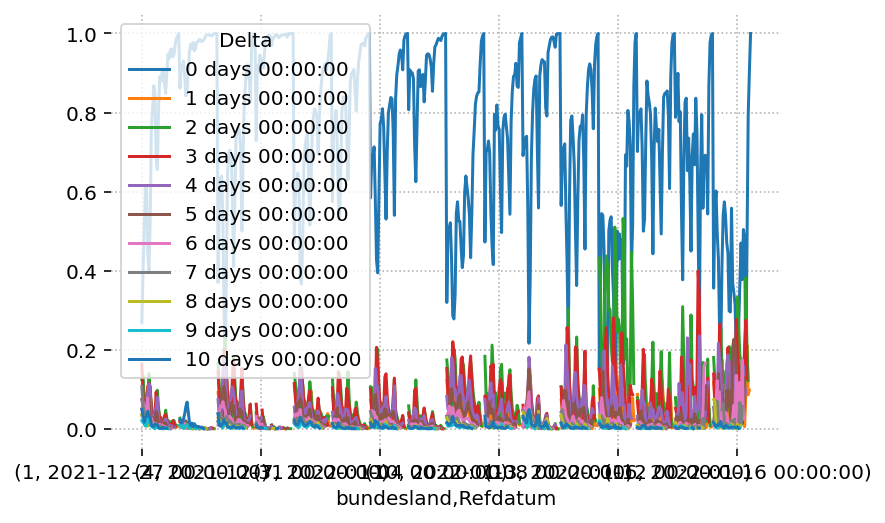

In [11]:
f.plot()

In [12]:
f['weekday'] = f.reset_index()['Refdatum'].dt.strftime("%a").values

In [13]:
f = f.reset_index().set_index(["bundesland","Refdatum","weekday"]).cumsum(1).mean(level=[0,2]).fillna(1)

In [14]:
f.loc[1]

Delta    0 days 00:00:00  1 days 00:00:00  2 days 00:00:00  3 days 00:00:00  \
weekday                                                                       
Mon             0.693533         0.730896         0.791646         0.860760   
Tue             0.795665         0.822451         0.872272         0.883964   
Wed             0.824160         0.858608         0.863793         0.888377   
Thu             0.868948         0.859654         0.882620         0.902895   
Fri             0.833049         0.852252         0.875135         0.901257   
Sat             0.735550         0.754578         0.801477         0.864893   
Sun             0.712365         0.738813         0.815153         0.871066   

Delta    4 days 00:00:00  5 days 00:00:00  6 days 00:00:00  7 days 00:00:00  \
weekday                                                                       
Mon             0.881622         0.901347         0.918496         0.955326   
Tue             0.905308         0.923353         0.950629         0.969831   
Wed             0.913137         0.943130         0.963843         0.978703   
Thu             0.929263         0.953191         0.969682         0.980269   
Fri             0.931276         0.954836         0.972254         0.977796   
Sat             0.907973         0.943093         0.956695         0.962932   
Sun             0.926832         0.944358         0.954685         0.960420   

Delta    8 days 00:00:00  9 days 00:00:00  10 days 00:00:00  
weekday                                                      
Mon             0.970141         0.979272               1.0  
Tue             0.981428         0.988520               1.0  
Wed             0.985467         0.991234               1.0  
Thu             0.985451         0.984739               1.0  
Fri             0.981204         0.984240               1.0  
Sat             0.967376         0.980532               1.0  
Sun             0.974686         0.985480               1.0

In [15]:
reporting_lag = np.array([f.loc[:,d.strftime("%a"),:].iloc[:,(cases_raw.index.levels[3][-1]-d).days] for d in cases_raw.index.levels[3][-9:]]).T

In [16]:
s="""01  Schleswig-Holstein
02  Hamburg
03  Niedersachsen
04  Bremen
05  Nordrhein-Westfalen
06  Hessen
07  Rheinland-Pfalz
08  Baden-Württemberg
09  Bayern
10  Saarland
11  Berlin
12  Brandenburg
13  Mecklenburg-Vorpommern
14  Sachsen
15  Sachsen-Anhalt
16  Thüringen"""
b={int(x.split()[0]): x.split()[1] for x in s.split("\n")}

In [17]:
current_lag = pd.DataFrame(reporting_lag, index=np.arange(1,17)).rename(index=b).sort_index()
current_lag

0         1         2         3         4  \
Baden-Württemberg       0.998846  0.997279  0.995152  0.986849  0.974678   
Bayern                  0.990928  0.982345  0.972185  0.943666  0.914890   
Berlin                  0.985992  0.983790  0.967213  0.908850  0.875098   
Brandenburg             0.996828  0.993134  0.984659  0.973231  0.935975   
Bremen                  1.000000  0.996690  0.994566  0.994019  0.991528   
Hamburg                 0.986340  0.983038  0.977095  0.962974  0.956425   
Hessen                  0.996820  0.996419  0.991840  0.978707  0.967147   
Mecklenburg-Vorpommern  0.993954  0.992240  0.981816  0.975918  0.960638   
Niedersachsen           0.993173  0.988442  0.974983  0.952424  0.904263   
Nordrhein-Westfalen     0.988563  0.983908  0.970110  0.938392  0.901987   
Rheinland-Pfalz         0.993440  0.990433  0.981028  0.961848  0.934915   
Saarland                0.993150  0.992089  0.987548  0.985423  0.959722   
Sachsen                 0.996672  0.998207  0.988938  0.983425  0.975566   
Sachsen-Anhalt          0.999621  0.997608  0.993590  0.984162  0.970891   
Schleswig-Holstein      0.985467  0.980269  0.972254  0.943093  0.926832   
Thüringen               0.995407  0.990574  0.978899  0.926084  0.909579   

                               5         6         7         8  
Baden-Württemberg       0.962772  0.971162  0.956532  0.938758  
Bayern                  0.843987  0.815558  0.747143  0.695852  
Berlin                  0.916683  0.915332  0.913843  0.909138  
Brandenburg             0.911929  0.903405  0.865985  0.828358  
Bremen                  0.962484  0.983613  0.965532  0.986302  
Hamburg                 0.959552  0.974691  0.972075  0.974667  
Hessen                  0.940987  0.940211  0.914918  0.903668  
Mecklenburg-Vorpommern  0.888703  0.883923  0.696848  0.674990  
Niedersachsen           0.863400  0.860526  0.825960  0.802447  
Nordrhein-Westfalen     0.881555  0.875771  0.843324  0.820104  
Rheinland-Pfalz         0.914234  0.908254  0.872605  0.861619  
Saarland                0.879920  0.899990  0.853066  0.846986  
Sachsen                 0.957804  0.951166  0.901203  0.842095  
Sachsen-Anhalt          0.953364  0.910116  0.814089  0.790548  
Schleswig-Holstein      0.860760  0.872272  0.858608  0.868948  
Thüringen               0.860599  0.806004  0.707576  0.551156

In [18]:
cases = cases_raw['AnzahlFall'].sum(level=(0,3)).sort_index()

In [19]:
cases_land = cases.reset_index()
cases_land['bundesland'] = (cases_land.IdLandkreis/1000).astype("int")
cases_land = cases_land.set_index(['bundesland', 'IdLandkreis','Refdatum']).sum(level=(0,2)).sort_index()
cases_land = cases_land.rename(index=b).sort_index()
cases_land = cases_land.loc[:,"2021-11-01":,:].unstack()["AnzahlFall"]#.iloc[:,:-1]
#cases_land.iloc[:,-9:] = (cases_land.iloc[:,-9:] / reporting_lag).astype("int32")
cases_land

Refdatum                2021-11-01  2021-11-02  2021-11-03  2021-11-04  \
bundesland                                                               
Baden-Württemberg             2140        2958        4431        4623   
Bayern                        5931        7041        9171        8919   
Berlin                        1262        1309        1475        1430   
Brandenburg                    808         977        1070        1061   
Bremen                          79          89          69          62   
Hamburg                        298         435         535         509   
Hessen                        1188        1592        1716        1582   
Mecklenburg-Vorpommern         418         428         405         317   
Niedersachsen                 1185        1453        1674        1370   
Nordrhein-Westfalen           2510        3362        4299        4372   
Rheinland-Pfalz                642         990        1127        1079   
Saarland                       126         123         203         230   
Sachsen                       2830        3665        3466        3295   
Sachsen-Anhalt                 647         856         721         738   
Schleswig-Holstein             337         390         366         354   
Thüringen                     1763        1447        1480        1566   

Refdatum                2021-11-05  2021-11-06  2021-11-07  2021-11-08  \
bundesland                                                               
Baden-Württemberg             5071        4131        2277        4411   
Bayern                        9214        8774        7199        9285   
Berlin                        1460         905         694        2197   
Brandenburg                   1184        1118         971        1254   
Bremen                          55          55          31          60   
Hamburg                        534         421         368         484   
Hessen                        1688        1321        1091        1469   
Mecklenburg-Vorpommern         544         505         313         528   
Niedersachsen                 1398        1165         843        1621   
Nordrhein-Westfalen           4070        3720        2852        4319   
Rheinland-Pfalz               1027         808         764        1081   
Saarland                       185         214         155         209   
Sachsen                       3452        3179        2642        4413   
Sachsen-Anhalt                 729         658         899         670   
Schleswig-Holstein             436         382         298         448   
Thüringen                     1428        1752        1185        1854   

Refdatum                2021-11-09  2021-11-10  ...  2022-01-18  2022-01-19  \
bundesland                                      ...                           
Baden-Württemberg             7139        7752  ...       16675       16440   
Bayern                       11202       12107  ...       18902       19242   
Berlin                        1900        2327  ...        9649       11728   
Brandenburg                   1491        1680  ...        4276        5665   
Bremen                         143          95  ...        1708        2071   
Hamburg                        514         593  ...        5449        6373   
Hessen                        1791        2065  ...        8704       10594   
Mecklenburg-Vorpommern         596         466  ...        2247        2003   
Niedersachsen                 1758        2166  ...        8338       10295   
Nordrhein-Westfalen           5241        5403  ...       26864       28600   
Rheinland-Pfalz               1139        1328  ...        4436        5118   
Saarland                       274         301  ...        1121        1457   
Sachsen                       5775        5954  ...        3287        2907   
Sachsen-Anhalt                1019        1178  ...        1763        2248   
Schleswig-Holstein             486         542  ...        5134       

In [20]:
clip = 0
cases_land.iloc[:,-9:] = (cases_land.iloc[:,-9:] / current_lag.values)#.astype("int32")
cases_land.loc["Hamburg"].iloc[-2:] = np.nan
cases_land = cases_land.iloc[:,:cases_land.shape[1]-clip]
cases_land

/Users/mg14/anaconda3/envs/npy/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/mg14/anaconda3/envs/npy/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Refdatum                2021-11-01  2021-11-02  2021-11-03  2021-11-04  \
bundesland                                                               
Baden-Württemberg             2140        2958        4431        4623   
Bayern                        5931        7041        9171        8919   
Berlin                        1262        1309        1475        1430   
Brandenburg                    808         977        1070        1061   
Bremen                          79          89          69          62   
Hamburg                        298         435         535         509   
Hessen                        1188        1592        1716        1582   
Mecklenburg-Vorpommern         418         428         405         317   
Niedersachsen                 1185        1453        1674        1370   
Nordrhein-Westfalen           2510        3362        4299        4372   
Rheinland-Pfalz                642         990        1127        1079   
Saarland                       126         123         203         230   
Sachsen                       2830        3665        3466        3295   
Sachsen-Anhalt                 647         856         721         738   
Schleswig-Holstein             337         390         366         354   
Thüringen                     1763        1447        1480        1566   

Refdatum                2021-11-05  2021-11-06  2021-11-07  2021-11-08  \
bundesland                                                               
Baden-Württemberg             5071        4131        2277        4411   
Bayern                        9214        8774        7199        9285   
Berlin                        1460         905         694        2197   
Brandenburg                   1184        1118         971        1254   
Bremen                          55          55          31          60   
Hamburg                        534         421         368         484   
Hessen                        1688        1321        1091        1469   
Mecklenburg-Vorpommern         544         505         313         528   
Niedersachsen                 1398        1165         843        1621   
Nordrhein-Westfalen           4070        3720        2852        4319   
Rheinland-Pfalz               1027         808         764        1081   
Saarland                       185         214         155         209   
Sachsen                       3452        3179        2642        4413   
Sachsen-Anhalt                 729         658         899         670   
Schleswig-Holstein             436         382         298         448   
Thüringen                     1428        1752        1185        1854   

Refdatum                2021-11-09  2021-11-10  ...  2022-01-18    2022-01-19  \
bundesland                                      ...                             
Baden-Württemberg             7139        7752  ...       16675  16458.993996   
Bayern                       11202       12107  ...       18902  19418.171216   
Berlin                        1900        2327  ...        9649  11894.619725   
Brandenburg                   1491        1680  ...        4276   5683.027532   
Bremen                         143          95  ...        1708   2071.000000   
Hamburg                        514         593  ...        5449   6461.261716   
Hessen                        1791        2065  ...        8704  10627.795849   
Mecklenburg-Vorpommern         596         466  ...        2247   2015.183267   
Niedersachsen                 1758        2166  ...        8338  10365.767898   
Nordrhein-Westfalen           5241        5403  ...       26864  28930.889665   
Rheinland-Pfalz               1139        1328  ...        4436   5151.797883   
Saarland                       274         301  ...        1121   1467.049484   
Sachsen                       5775        5954  ...        3287   2916.706697   
Sachsen-Anhalt                1019        1178  ...        1763   2248.852347   
Schleswig-Holstein             486    

In [21]:
C = cases_land.values

In [22]:
capita = pd.read_csv("data/12411-0010.csv", index_col=0)["Population"]
capita

Baden-Württemberg         11103043
Bayern                    13140183
Berlin                     3664088
Brandenburg                2531071
Bremen                      680130
Hamburg                    1852478
Hessen                     6293154
Mecklenburg-Vorpommern     1610774
Niedersachsen              8003421
Nordrhein-Westfalen       17925570
Rheinland-Pfalz            4098391
Saarland                    983991
Sachsen                    4056941
Sachsen-Anhalt             2180684
Schleswig-Holstein         2910875
Thüringen                  2120237
Name: Population, dtype: int64

In [267]:
from genomicsurveillance.misc import fused_basis
B0 = fused_basis(C.shape[1]+clip, inc=10, fuse=4) ## cubic spline basis every 10d, last 4 linearly fused to avoid wriggles 

In [30]:
seq_index = np.array([list(cases_land.columns).index(i) for i in genomes.index.levels[1]])

In [256]:
from genomicsurveillance.misc import MultiLineageTimeShift, plot_lad, plot_growth_rates

In [36]:
from numpyro.infer import Trace_ELBO

In [37]:
GG = np.concatenate([G, G.sum(0, keepdims=True)], axis=0) # Add Germany as a whole
CC = np.concatenate([C, C.sum(0, keepdims=True)], axis=0)    

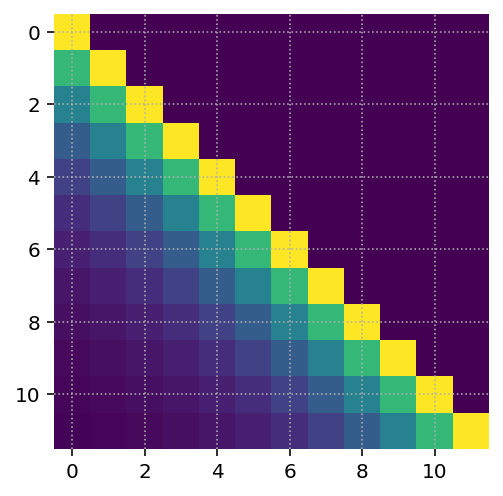

In [42]:
arma2 = np.eye(arma.shape[0]) ## Prior covariance matrix for the splines to avoid too many wrinkles
for j in range(arma2.shape[0]-1):
    arma2[j+1,j] = -0.667
arma2 = np.linalg.inv(arma2)
plt.imshow(arma2)

In [43]:
model = MultiLineageTimeShift(
    CC,
    GG,    
    seq_index,
    np.concatenate([capita.values, capita.values.sum().reshape(1)]),
    #auto_correlation=0.5,
    #linearize=True,
    arma = arma2,
    b_scale=0.01,
    b0_scale=0.3,
    beta_scale= np.append(10.,np.repeat(10., B0.shape[2]-1)),# np.concatenate([np.repeat(1., knots.num_long_basis), np.repeat(.1, knots.num_short_basis)]),
    tau=4.6,
    basis=B0, #knots.basis,
    shift=7,  
    alpha0=.01,
    alpha1=100., 
    week=True,
    #model_kwargs={'handler':'SVI', 'loss':Trace_ELBO(num_particles=5), 'num_epochs':10000, 'lr':0.001, 'num_samples': 100}
    model_kwargs={'handler':'SVI', 'loss':Trace_ELBO(num_particles=5), 'num_epochs':10000, 'lr':0.005, 'lrd': 0.2 ** (1/10000), 'num_samples': 100}

)

In [44]:
model.fit()

/Users/mg14/anaconda3/envs/npy/lib/python3.7/site-packages/jax/_src/numpy/lax_numpy.py:6576: UserWarning: Explicitly requested dtype float requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  lax._check_user_dtype_supported(dtype, "astype")


SVI step 0 / 10,000 | 0 %
SVI step 1,000 / 10,000 | 10 %
SVI step 2,000 / 10,000 | 20 %
SVI step 3,000 / 10,000 | 30 %
SVI step 4,000 / 10,000 | 40 %
SVI step 5,000 / 10,000 | 50 %
SVI step 6,000 / 10,000 | 60 %
SVI step 7,000 / 10,000 | 70 %
SVI step 8,000 / 10,000 | 80 %
SVI step 9,000 / 10,000 | 90 %


Text(0, 0.5, 'ELBO')

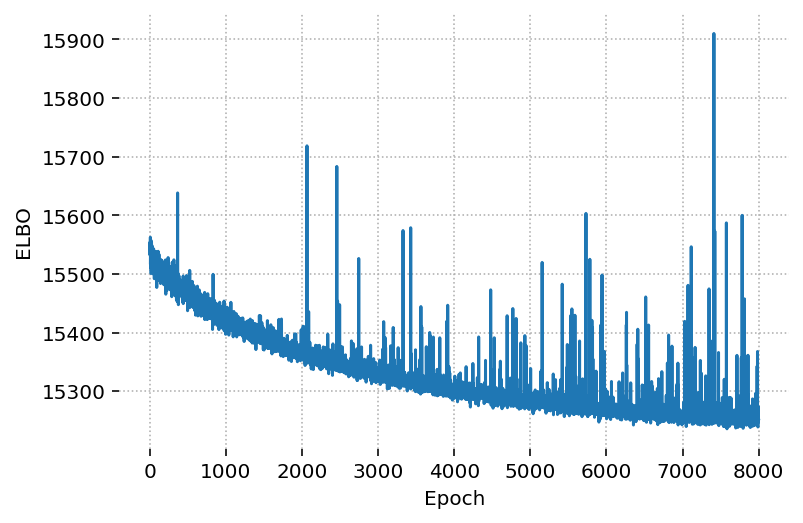

In [45]:
plt.plot(model.loss[2000:])
plt.xlabel('Epoch')
plt.ylabel('ELBO')
#plt.ylim((None, model.loss[2000]))

/Users/mg14/Downloads/desh-data/genomicsurveillance/misc/misc.py:752: RuntimeWarning: divide by zero encountered in log
  rax2 = ax[2].secondary_yaxis('right', functions=(lambda x: np.exp(x*model.tau), lambda x: np.log(x)/model.tau))


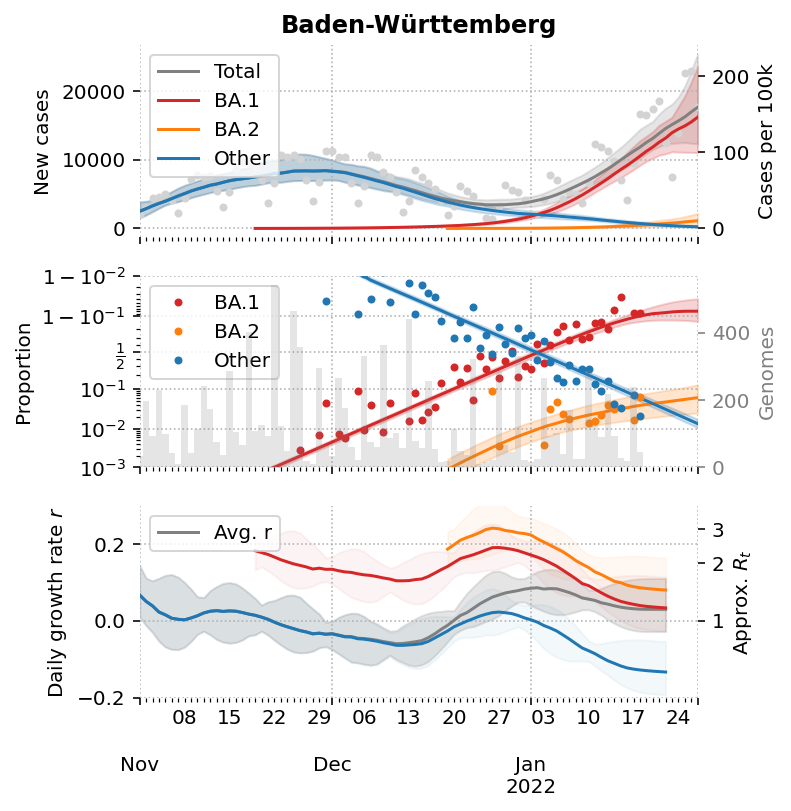

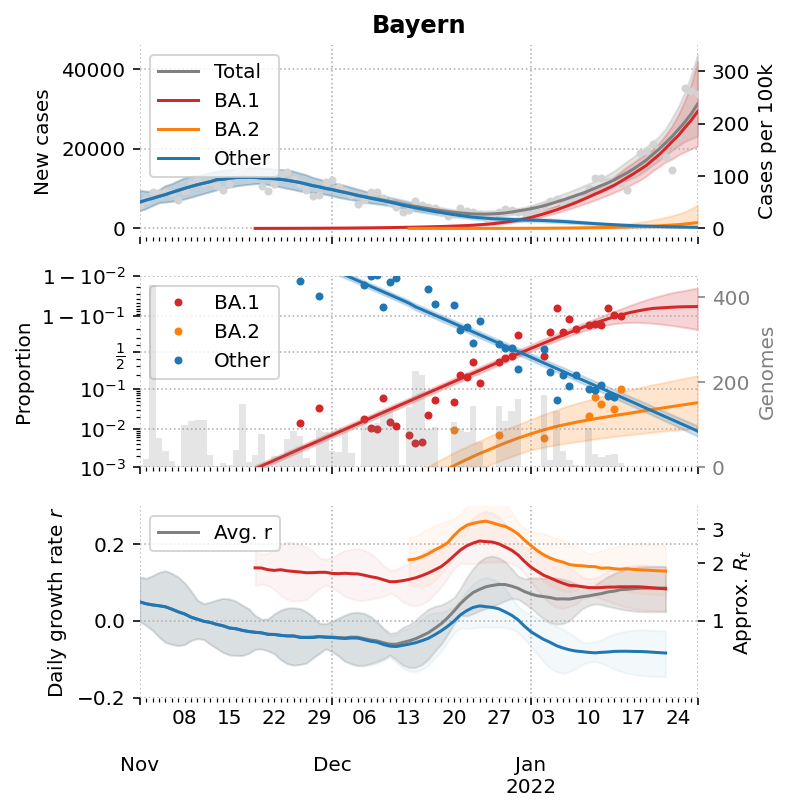

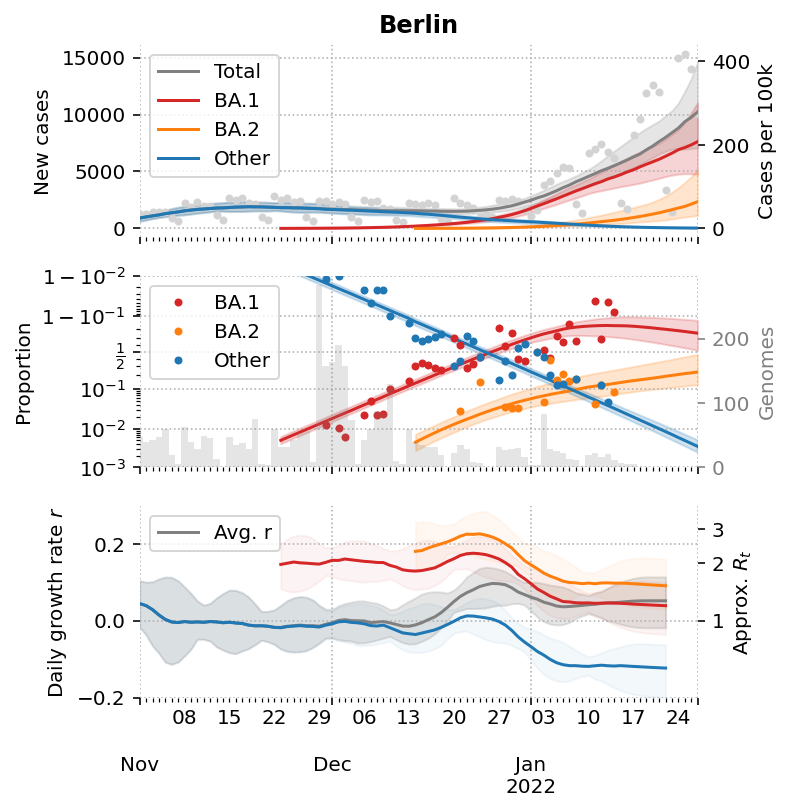

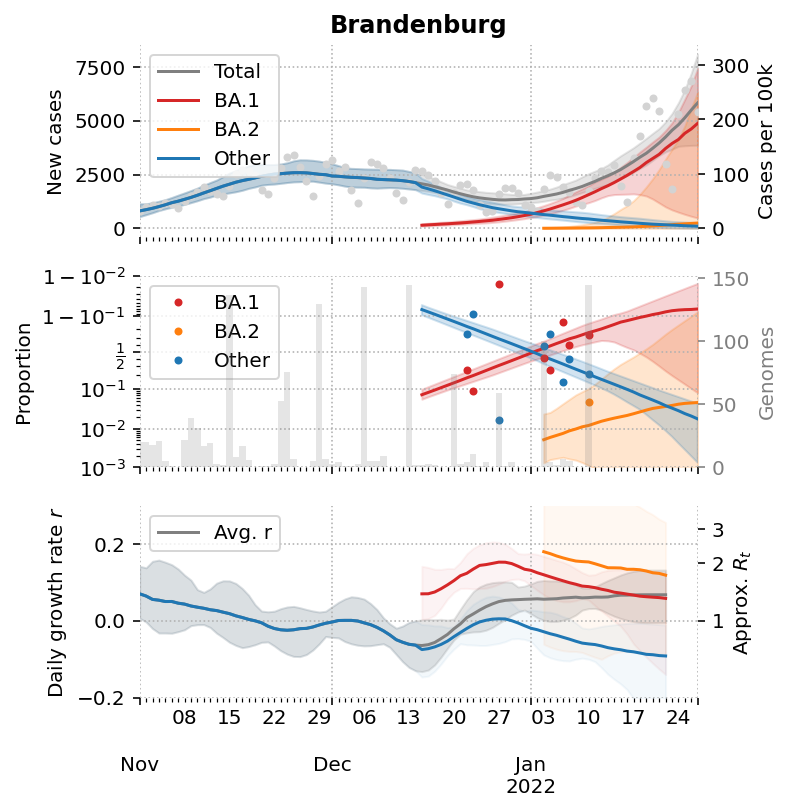

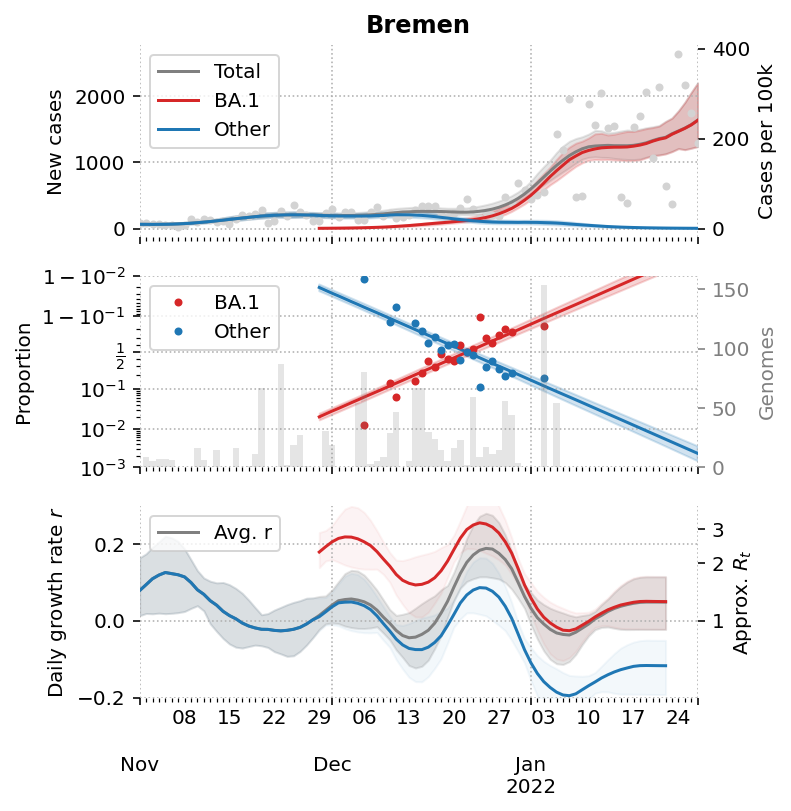

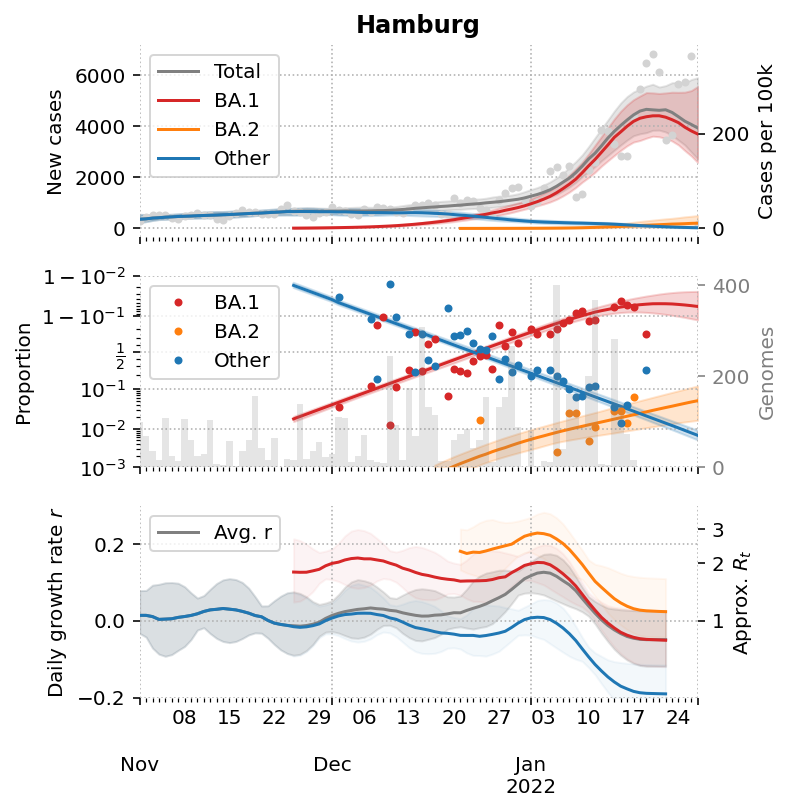

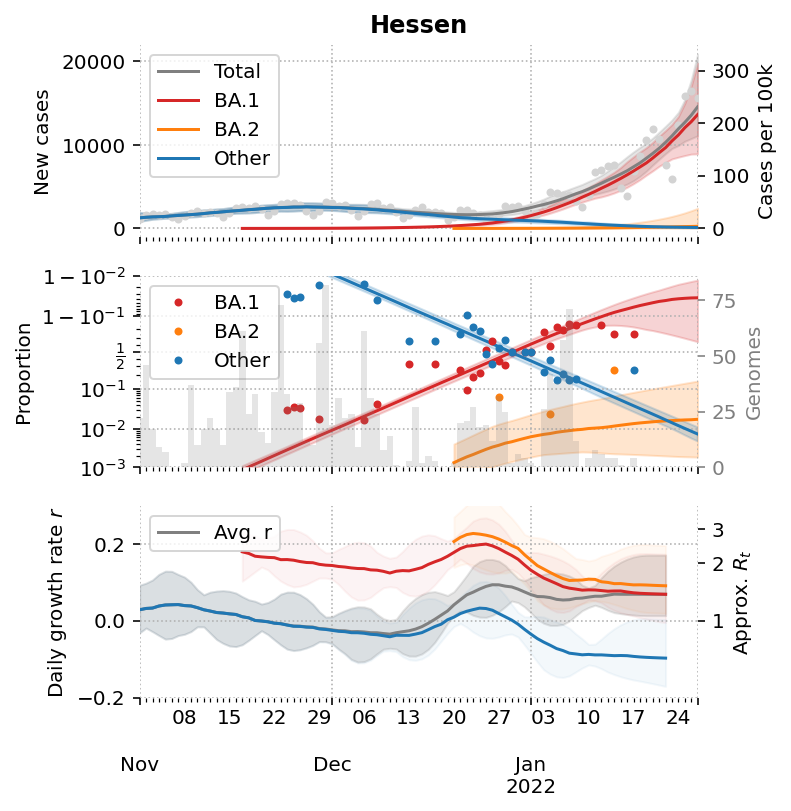

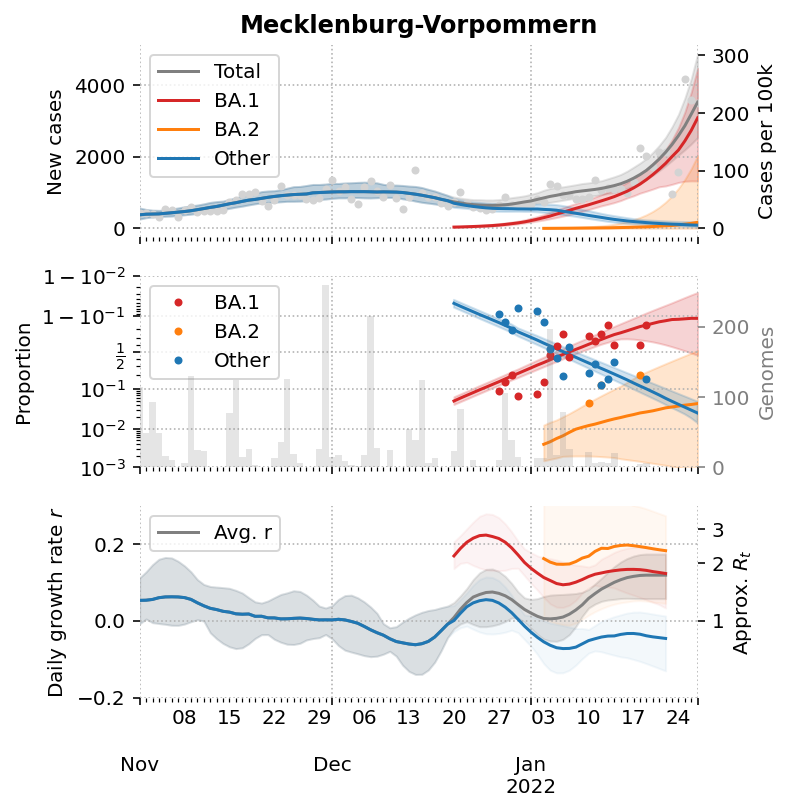

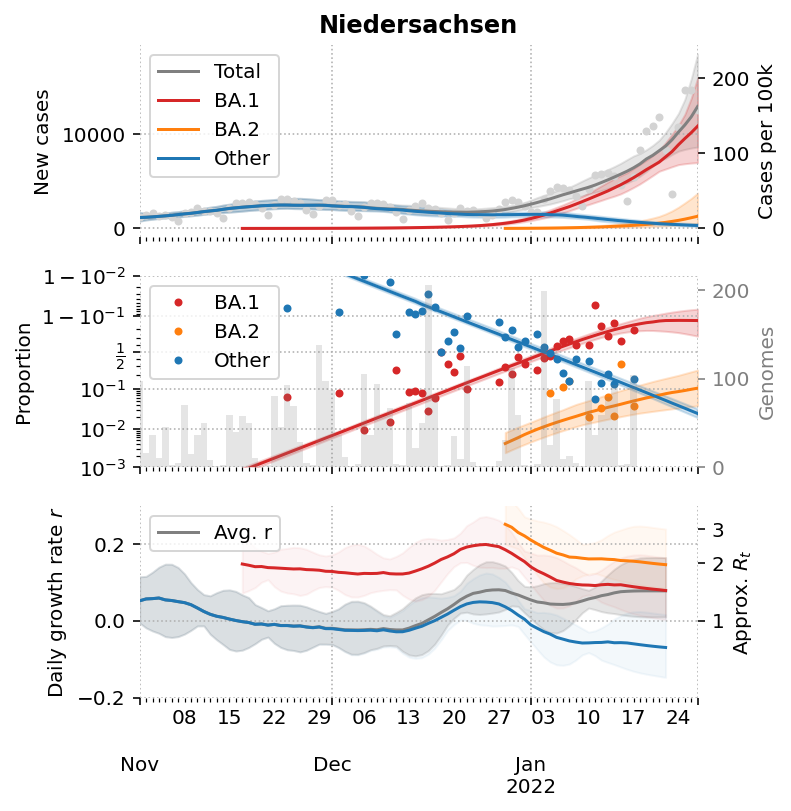

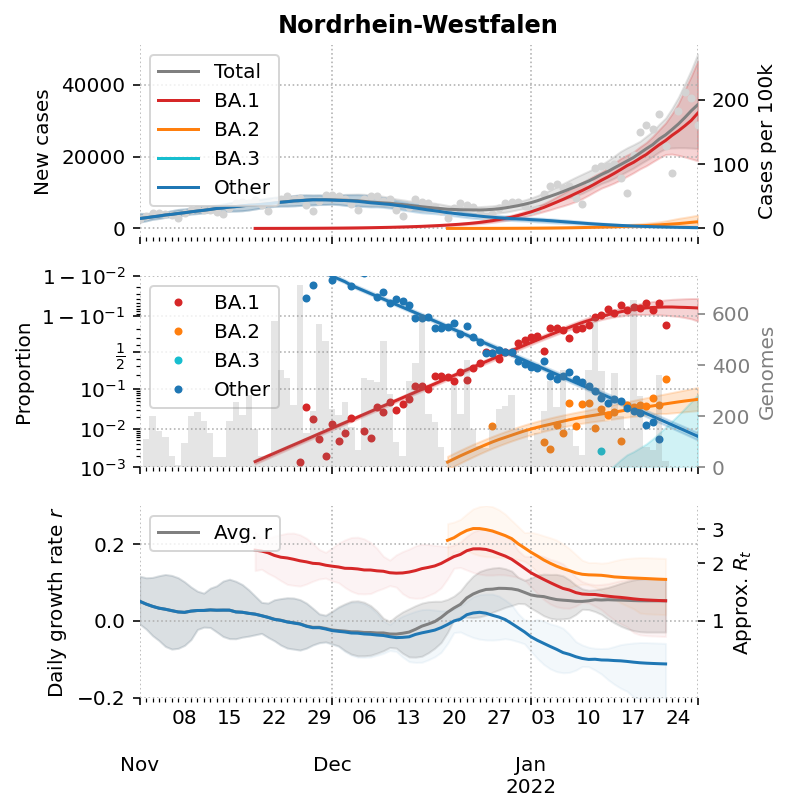

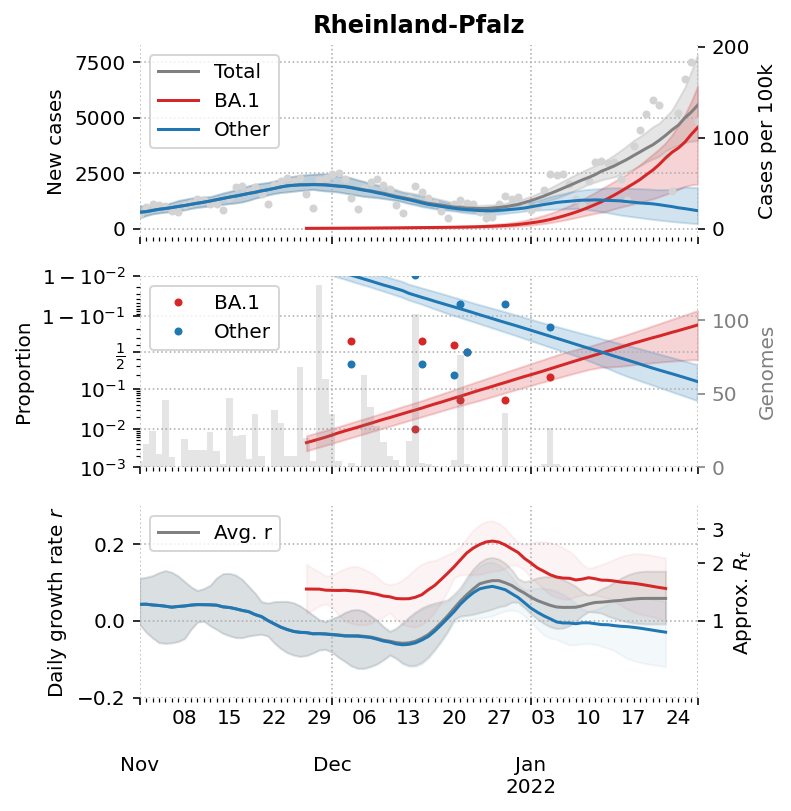

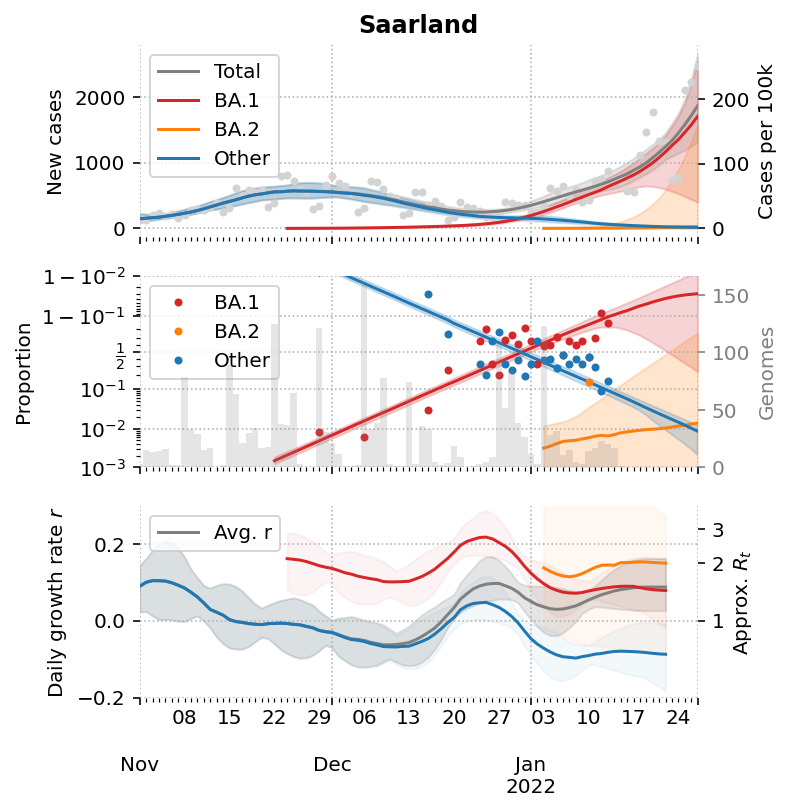

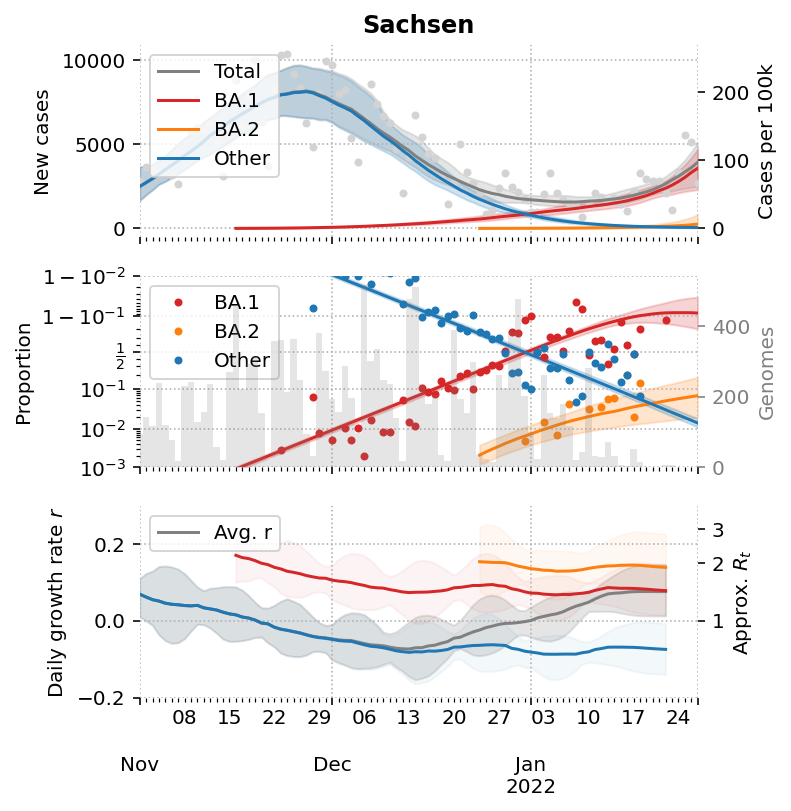

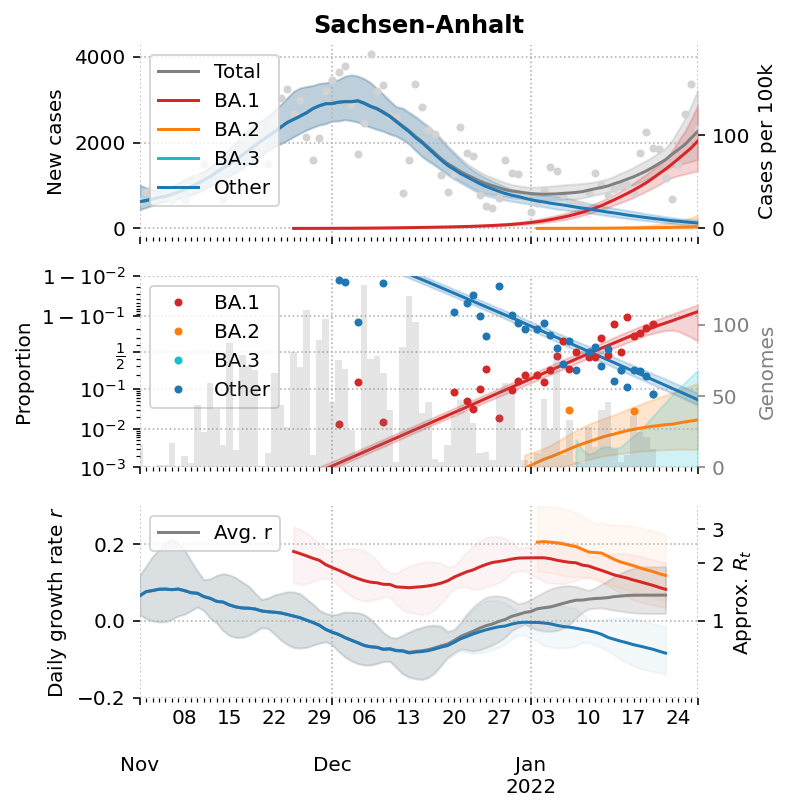

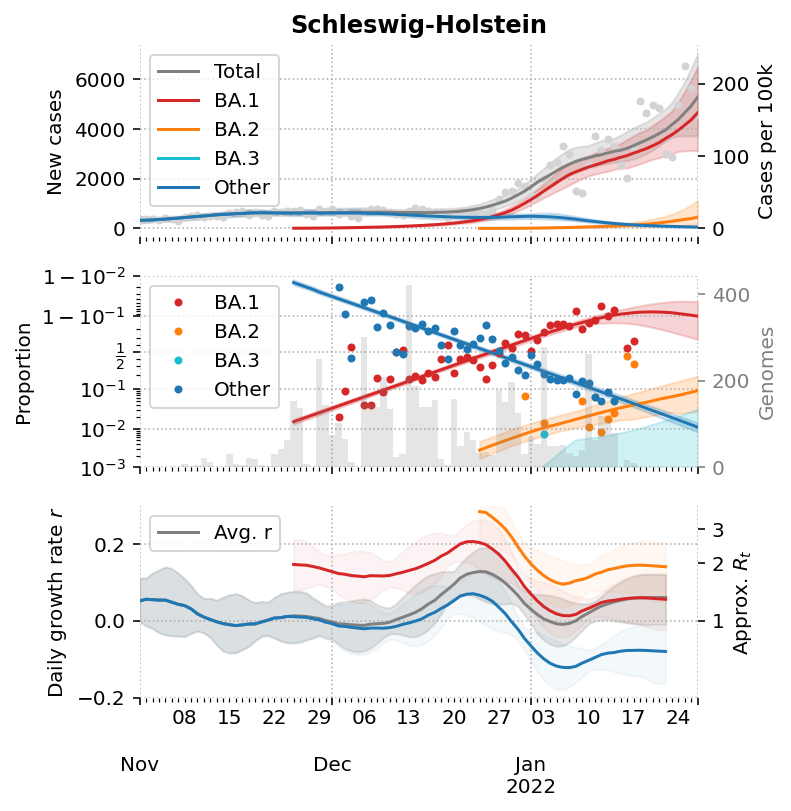

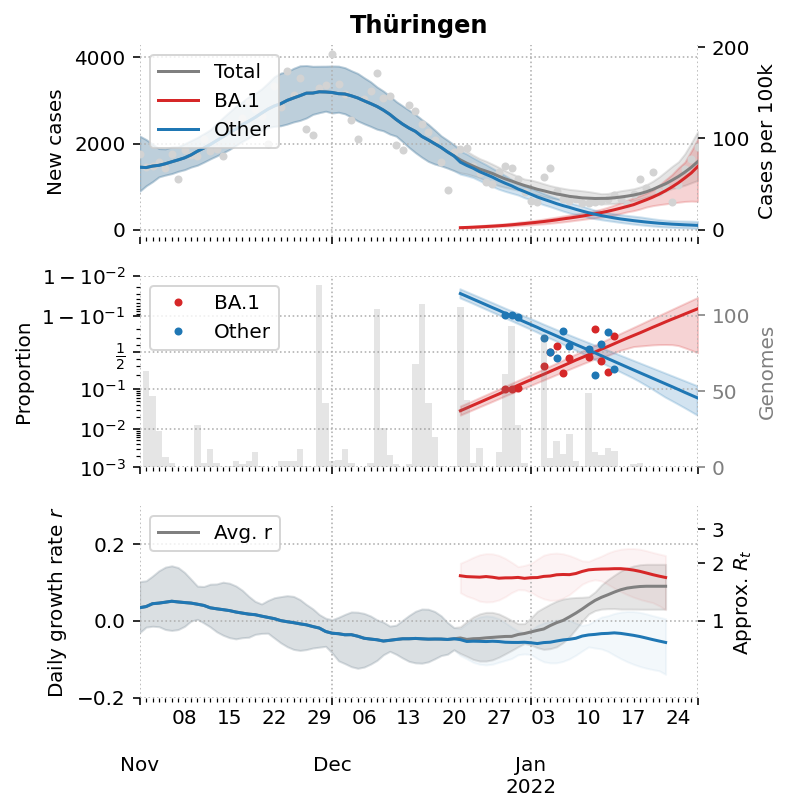

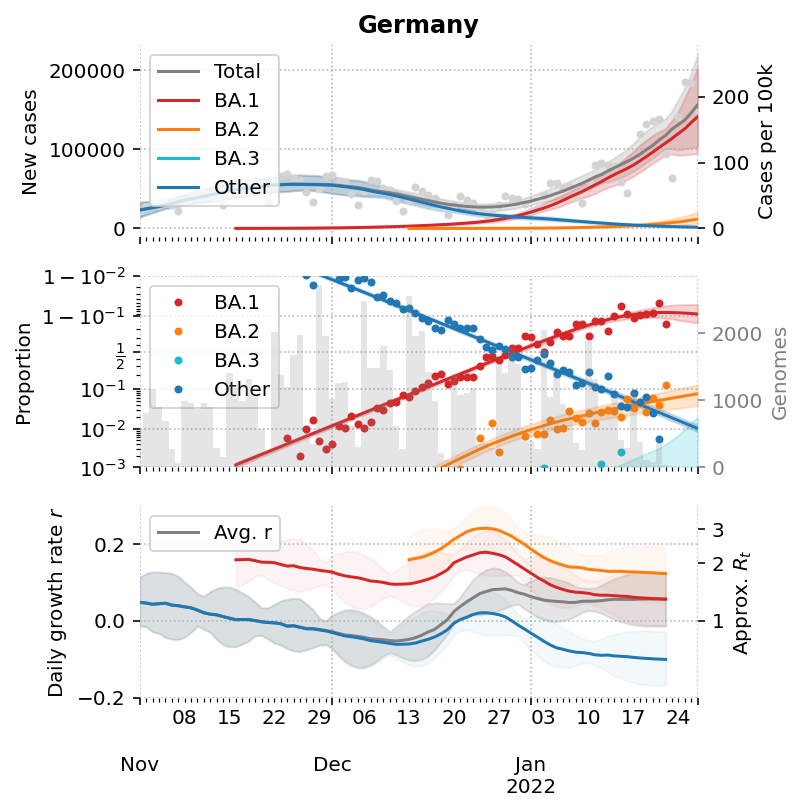

In [49]:
#from genomicsurveillance.plots.england import plot_lad, 
from genomicsurveillance.plots.england import plot_median_and_ci
for i,r in enumerate(cases_land.index.to_list() + ["Germany"]):
    w = np.where(GG[i].sum(0)[1:] >= 1)[0] + 1
    plot_lad(model, i, CC, GG, seq_index, start_date="2021-11-01", show_start_date="2021-11-01",
        lin = w,
        labels = genomes.columns[w],
        lin_colors=np.array(['C2', "C3" ,"C1", "C9","C0"])[w],#, "C6", "C1","C8"],
        #labels=[alias(y) if alias(y) != "AY.121" else "Orf3a:202L" for y in x],#["B.1.1.7", 'Delta', "AY.4", 'B.1.617.2.5', "B.1.177"],
        case_color="grey",
        case_markercolor="lightgrey",
            figsize=(5,6),
            prop_err=False)

    ax=plt.gcf().get_axes()
    
    ax[0].set_title(r, size=12, weight='bold')
    #ax[0].set_yscale('log')
    #ax[0].set_ylim((1,None))
   
    #ax[1].grid(which='both', ls=":")
    #ax[0].legend(loc='center left')
    #ax[2].set_ylim((-0.2,0.3))
    #ax[3].grid(False)
    
    #for a in ax:
        #a.xaxis.set_major_formatter(pd.plotting._matplotlib.converter.TimeSeries_DateFormatter("D"))
        #for s in a.spines:
        #    a.spines[s].set_visible(True)
    #fig = plt.gcf()
    #plt.tight_layout()
    ax[1].set_yscale("logit")
    ax[1].set_ylim((1e-3,1-1e-2))
    ax[2].set_ylim((-.2,.3))
    ax[2].legend(loc="upper left")

In [50]:
λ = model.get_lambda_lineage().mean(0) / model.population[:,np.newaxis, np.newaxis]

In [51]:
λ.shape

(17, 88, 5)

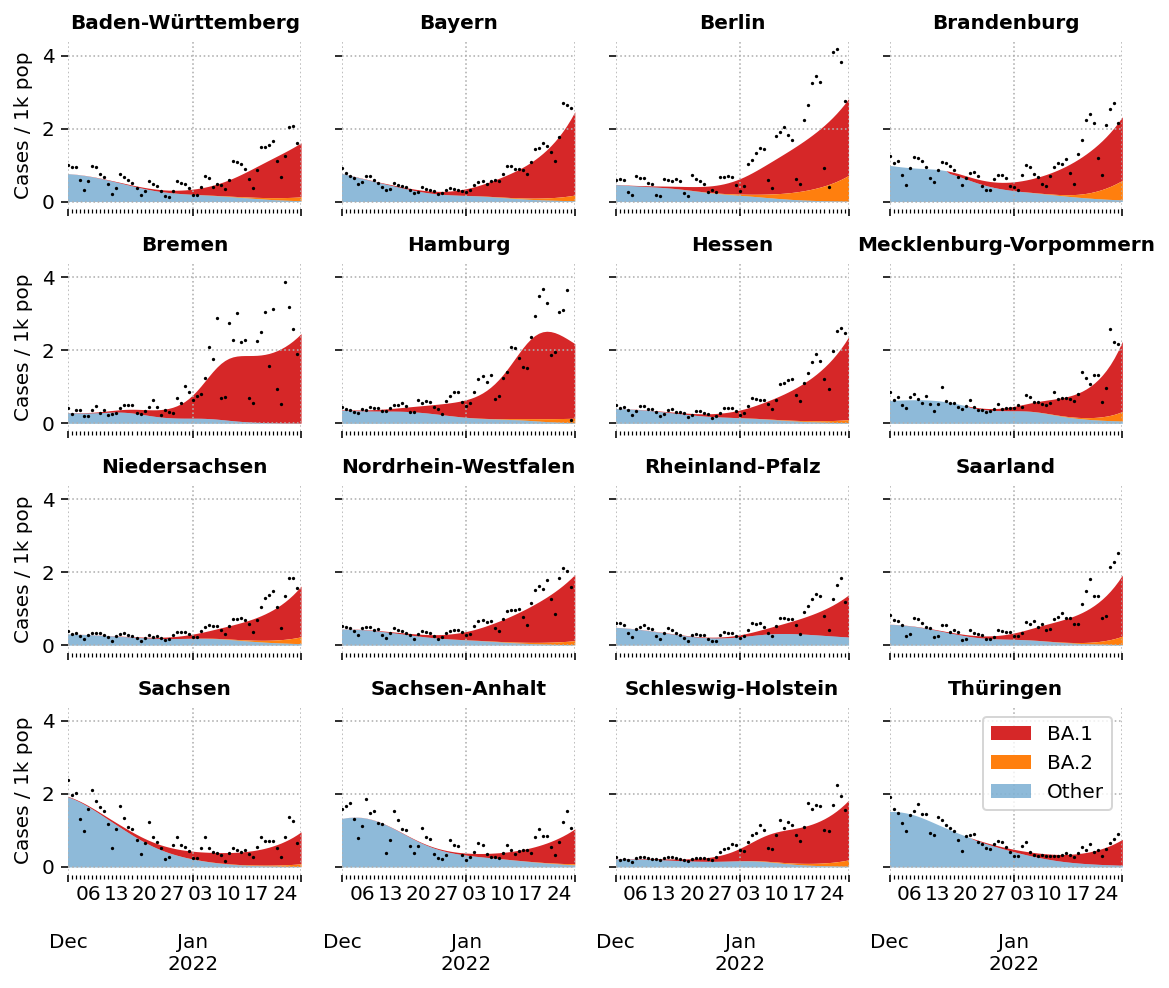

In [52]:
fig, ax = plt.subplots(4,4, figsize=(8,7), sharex=True, sharey=True)
ax = ax.flatten()
for i,r in enumerate(cases_land.index):
    y = pd.DataFrame(λ[i,:,:], columns=genomes.columns, index=cases_land.columns[1] + np.arange(λ.shape[1]).astype('timedelta64[D]')) #cases_land.loc[r].loc["2021-12-01":,'AnzahlFall'] / capita[r] * 1000 #* 700
    y = y[["Other","BA.2","BA.1","BA.3","B.1.1.529"]].cumsum(1) * 1000
    #y.index.name = 'date'
    #x = prop_bl.loc[r,:,:][0].unstack()
    #z = x[0.5] * y
    y["B.1.1.529"].plot(ax=ax[i], ls="", label="")
    (cases_land.loc[r]/capita[r]*1000).plot(ax=ax[i], marker=".", markersize=1.3, color="k", ls="", label="")
    ax[i].fill_between(y.index, y["BA.2"], y["B.1.1.529"], color='C3', alpha=1, lw=0, label="BA.1")
    ax[i].fill_between(y.index, y["Other"], y["BA.2"], color='C1', alpha=1, lw=0, label="BA.2")
    ax[i].fill_between(y.index, y["Other"], color='C0', alpha=.5, lw=0, label="Other")
    #ax[i].fill_between(z.index, y-x[0.95]*y, y-x[0.5]*y, color='none',alpha=1, lw=0, label="Omicron", hatch="//////", edgecolor="C3")
    ax[i].set_title(r, size=10 , weight='bold')
    ax[i].set_xlabel(None)
    ax[i].set_ylabel("Cases / 1k pop")
    ax[i].grid(ls=":")
    ax[i].set_xlim(("2021-12-01",None))
    for a in ax[i].spines.values():
        a.set_visible(False)
ax[-1].legend(title=None)
plt.tight_layout()
#fig.savefig("plots/omi_abs_by_area.png",dpi=200,bbox_inches='tight',pad_inches=0.2)

n  Growth rate r to ancestor      +/-   \
Lineage                                                  
B.1.1.529     354                   0.087360  0.019686   
BA.1        36768                   0.124329  0.014723   
BA.2          720                   0.192090  0.011316   
BA.3            8                  -0.042695  0.051127   
Other      126384                   0.000000  0.000000   

           Growth rate r to baseline BA.1       +/-  
Lineage                                              
B.1.1.529                       -0.065231  0.019686  
BA.1                             0.000000  0.014723  
BA.2                             0.058542  0.011316  
BA.3                            -0.225289  0.051127  
Other                           -0.157649  0.000000

/Users/mg14/Downloads/desh-data/genomicsurveillance/misc/misc.py:821: RuntimeWarning: divide by zero encountered in log
  ax3 = plt.gca().secondary_yaxis('right', functions=(lambda x: np.exp(x*model.tau), lambda x: np.log(x)/model.tau))


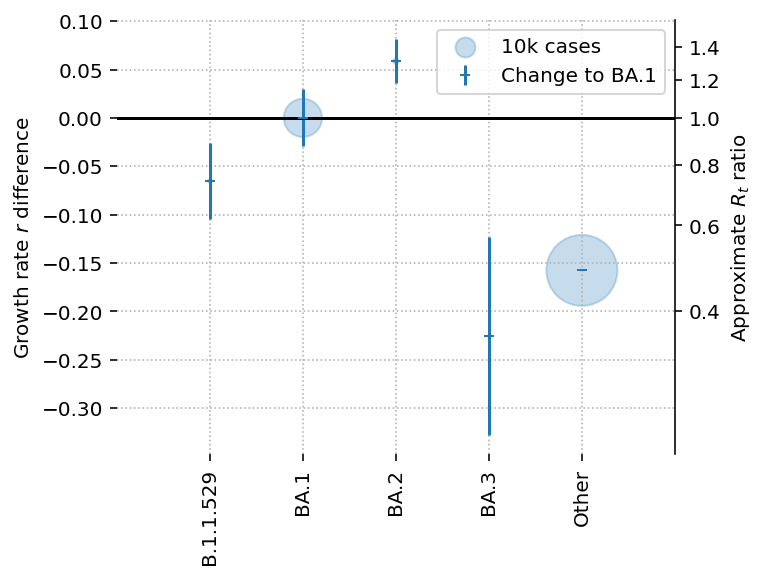

In [53]:
plt.figure(figsize=(5,4))
plot_growth_rates(model, genomes.columns.to_list(), color=["C0","None"], baseline="BA.1")

In [55]:
import geopandas as gpd

In [57]:
bl = gpd.read_file("data/bundeslaender.geojson").set_index("bundesland")

In [58]:
bl

land  \
bundesland                            
Baden-Württemberg       Deutschland   
Bayern                  Deutschland   
Berlin                  Deutschland   
Brandenburg             Deutschland   
Bremen                  Deutschland   
Hamburg                 Deutschland   
Hessen                  Deutschland   
Mecklenburg-Vorpommern  Deutschland   
Niedersachsen           Deutschland   
Nordrhein-Westfalen     Deutschland   
Rheinland-Pfalz         Deutschland   
Saarland                Deutschland   
Sachsen                 Deutschland   
Sachsen-Anhalt          Deutschland   
Schleswig-Holstein      Deutschland   
Thüringen               Deutschland   

                                                                 geometry  
bundesland                                                                 
Baden-Württemberg       MULTIPOLYGON (((7.63396 47.56122, 7.68592 47.5...  
Bayern                  MULTIPOLYGON (((9.63623 47.60202, 9.74582 47.6...  
Berlin                  POLYGON ((13.73143 52.41981, 13.73412 52.40198...  
Brandenburg             POLYGON ((14.03274 51.47500, 14.06259 51.44542...  
Bremen                  MULTIPOLYGON (((8.96595 53.05772, 8.98022 53.0...  
Hamburg                 MULTIPOLYGON (((10.21828 53.49923, 10.26573 53...  
Hessen                  MULTIPOLYGON (((8.90009 49.48187, 8.89974 49.5...  
Mecklenburg-Vorpommern  MULTIPOLYGON (((11.52874 54.07105, 11.51283 54...  
Niedersachsen           MULTIPOLYGON (((10.36397 51.55606, 10.36689 51...  
Nordrhein-Westfalen     MULTIPOLYGON (((6.16603 50.66186, 6.19337 50.6...  
Rheinland-Pfalz         POLYGON ((8.28766 48.99838, 8.23545 48.96749, ...  
Saarland                POLYGON ((7.31027 49.12958, 7.29356 49.11499, ...  
Sachsen                 POLYGON ((12.23908 50.24698, 12.26616 50.25888...  
Sachsen-Anhalt          POLYGON ((12.19559 51.14146, 12.24134 51.13061...  
Schleswig-Holstein      MULTIPOLYGON (((11.00454 54.45007, 11.01815 54...  
Thüringen               POLYGON ((10.59094 50.27180, 10.60497 50.29310...

In [59]:
genomes

lineage                       B.1.1.529  BA.1  BA.2  BA.3  Other
bundesland        date                                          
Baden-Württemberg 2021-11-01          0     0     0     0     35
                  2021-11-02          0     0     0     0    197
                  2021-11-03          0     0     0     0     94
                  2021-11-04          0     0     0     0    230
                  2021-11-05          0     0     0     0     99
...                                 ...   ...   ...   ...    ...
Thüringen         2022-01-19          0     0     0     0      0
                  2022-01-20          0     0     0     0      0
                  2022-01-21          0     0     0     0      0
                  2022-01-22          0     0     0     0      0
                  2022-01-23          0     0     0     0      0

[1344 rows x 5 columns]

In [60]:
λ.max()

0.0024525866689281803

In [61]:
de = bl.copy()
de.geometry = de.buffer(1e-2)
de = de.dissolve(by='land')

/Users/mg14/anaconda3/envs/npy/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


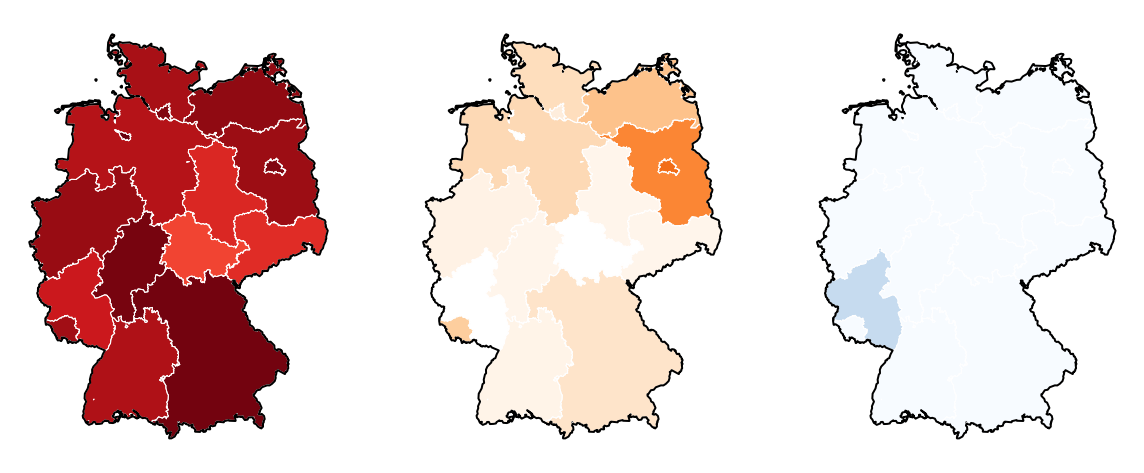

In [62]:
from matplotlib.colors import LogNorm
fig, axs = plt.subplots(1,3, figsize=(10,6))
for ax in axs:
    ax.axis("off")
#camera = Camera(fig)
vmax = λ[:-1,-1,:].max()
vmin = 1e-4
b0 = bl.copy().merge(pd.DataFrame(λ[:-1,-1,:], columns=genomes.columns, index=bl.index), 
                     left_index=True, right_index=True)
b0.plot("BA.1", ax=axs[0], cmap="Reds", norm=LogNorm(vmin=vmin, vmax=vmax))
b0.plot("BA.2", ax=axs[1], cmap="Oranges",norm=LogNorm(vmin=vmin, vmax=vmax))
b0.plot("Other", ax=axs[2], cmap="Blues",norm=LogNorm(vmin=vmin, vmax=vmax))
for ax in axs:
    bl.boundary.plot(color='w',lw=0.5, ax=ax)
    de.boundary.plot(color='k',lw=1, ax=ax)

In [63]:
genomes.loc["Rheinland-Pfalz","2022-01-01":,:]

lineage                     B.1.1.529  BA.1  BA.2  BA.3  Other
bundesland      date                                          
Rheinland-Pfalz 2022-01-01          0     0     0     0      0
                2022-01-02          0     0     0     0      0
                2022-01-03          0     2     0     0      0
                2022-01-04          0     5     0     0     22
                2022-01-05          0     0     0     0      2
                2022-01-06          0     0     0     0      0
                2022-01-07          0     0     0     0      0
                2022-01-08          0     0     0     0      1
                2022-01-09          0     0     0     0      0
                2022-01-10          0     1     0     0      0
                2022-01-11          0     0     0     0      0
                2022-01-12          0     0     0     0      1
                2022-01-13          0     0     0     0      0
                2022-01-14          0     1     0     0      0
                2022-01-15          0     0     0     0      0
                2022-01-16          0     0     0     0      0
                2022-01-17          0     0     0     0      0
                2022-01-18          0     0     0     0      0
                2022-01-19          0     0     0     0      0
                2022-01-20          0     0     0     0      0
                2022-01-21          0     0     0     0      0
                2022-01-22          0     0     0     0      0
                2022-01-23          0     0     0     0      0

In [64]:
capita.values @ λ[:-1,-1,:]

array([  1159.26004652, 141520.6131824 ,  12920.99069421,    542.88632275,
         2734.43692383])

In [65]:
(lambda x: x/x.sum(1, keepdims=True))(λ[:,-1,:])

array([[3.15129230e-03, 9.18237926e-01, 6.48902031e-02, 0.00000000e+00,
        1.37205787e-02],
       [4.14556788e-03, 9.23647045e-01, 6.34402890e-02, 0.00000000e+00,
        8.76709818e-03],
       [5.94543965e-03, 7.39778695e-01, 2.50710511e-01, 0.00000000e+00,
        3.56535393e-03],
       [0.00000000e+00, 7.50041492e-01, 2.30900115e-01, 0.00000000e+00,
        1.90583932e-02],
       [0.00000000e+00, 9.97630128e-01, 0.00000000e+00, 0.00000000e+00,
        2.36987204e-03],
       [1.89624517e-03, 9.33939158e-01, 5.73225071e-02, 0.00000000e+00,
        6.84208969e-03],
       [2.51052431e-02, 9.32418273e-01, 3.52224211e-02, 0.00000000e+00,
        7.25406281e-03],
       [2.19369436e-02, 8.33334532e-01, 1.17151200e-01, 0.00000000e+00,
        2.75773240e-02],
       [2.56033738e-03, 8.55637676e-01, 1.16473253e-01, 0.00000000e+00,
        2.53287339e-02],
       [2.77462206e-03, 9.22248540e-01, 5.69397835e-02, 1.16547016e-02,
        6.38235292e-03],
       [4.09474427e-02, 7.9727

In [66]:
from celluloid import Camera
from tqdm import tqdm
from matplotlib import colors


100%|██████████| 88/88 [00:23<00:00,  3.78it/s]


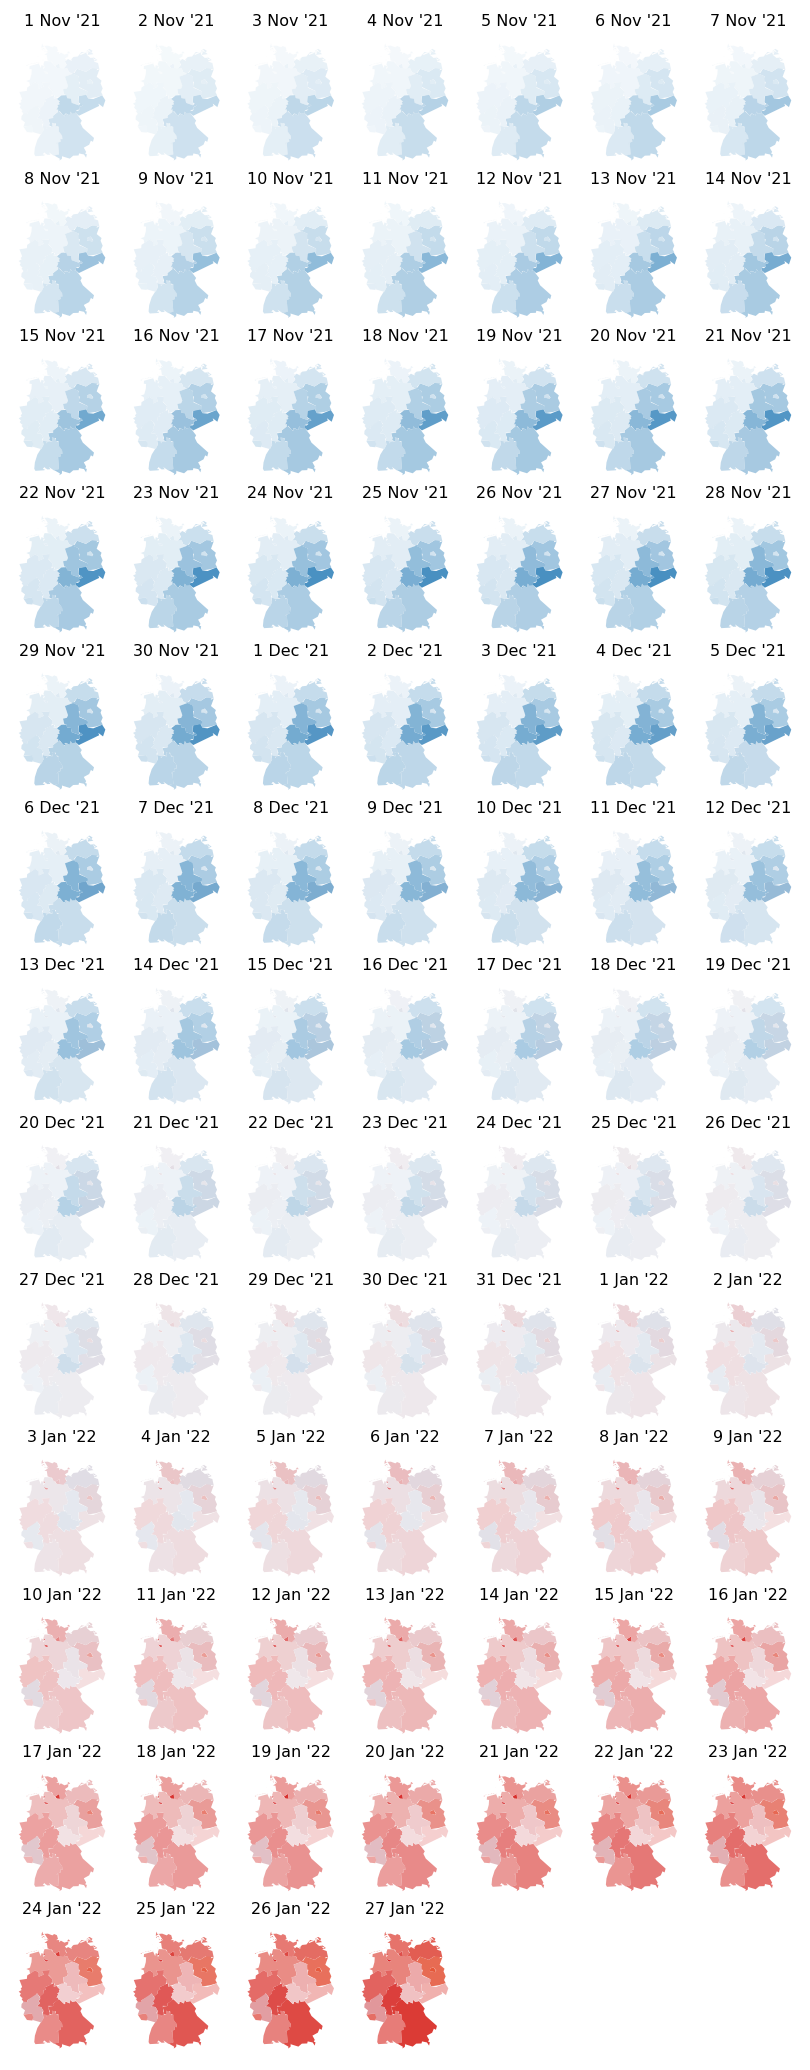

In [67]:
n = 7
m = (int(λ.shape[1]/7)+1)
fig, axs = plt.subplots(m,n, figsize=(7,10*m/n))
#camera = Camera(fig)
b0 = bl.copy().simplify(1e-1)
axs = axs.flatten()
for ax in axs:
    ax.axis("off")

    
def make_rgb_transparent(rgb, bg_rgb, alpha):
    return [alpha * c1 + (1 - alpha) * c2 for (c1, c2) in zip(rgb, bg_rgb)]
r = colors.colorConverter.to_rgb("C3")
b = colors.colorConverter.to_rgb("C0")
y = colors.colorConverter.to_rgb("C1")

for i in tqdm(range(λ.shape[1])): #λ.shape[1])
    ax = axs[i]
        
    #alpha = np.minimum(1, λ[:-1,i,[1,4]] * 700) #/λ.max()

    alpha = λ[:-1,i,[1,2,4]]/λ.max()
    c = [make_rgb_transparent(y, make_rgb_transparent(r, make_rgb_transparent(b, (1,1,1), x[2]), x[0]), x[1]) for x in alpha]

    ax.set_title((cases_land.columns[0] + np.timedelta64(i,"D")).strftime("%-d %b \'%y"), size=8)
    b0.plot(color=c, ax=ax)

    #bl.boundary.plot(color='w',lw=0.5, ax=ax)
    #de.boundary.plot(color='k',lw=1, ax=ax)
    #camera.snap()


In [68]:
f"{λ[:-1,-1,1] @ capita.values:0.0f}"

'141521'

In [69]:
λ.max()*700

1.7168106682497262

100%|██████████| 88/88 [05:13<00:00,  3.57s/it]


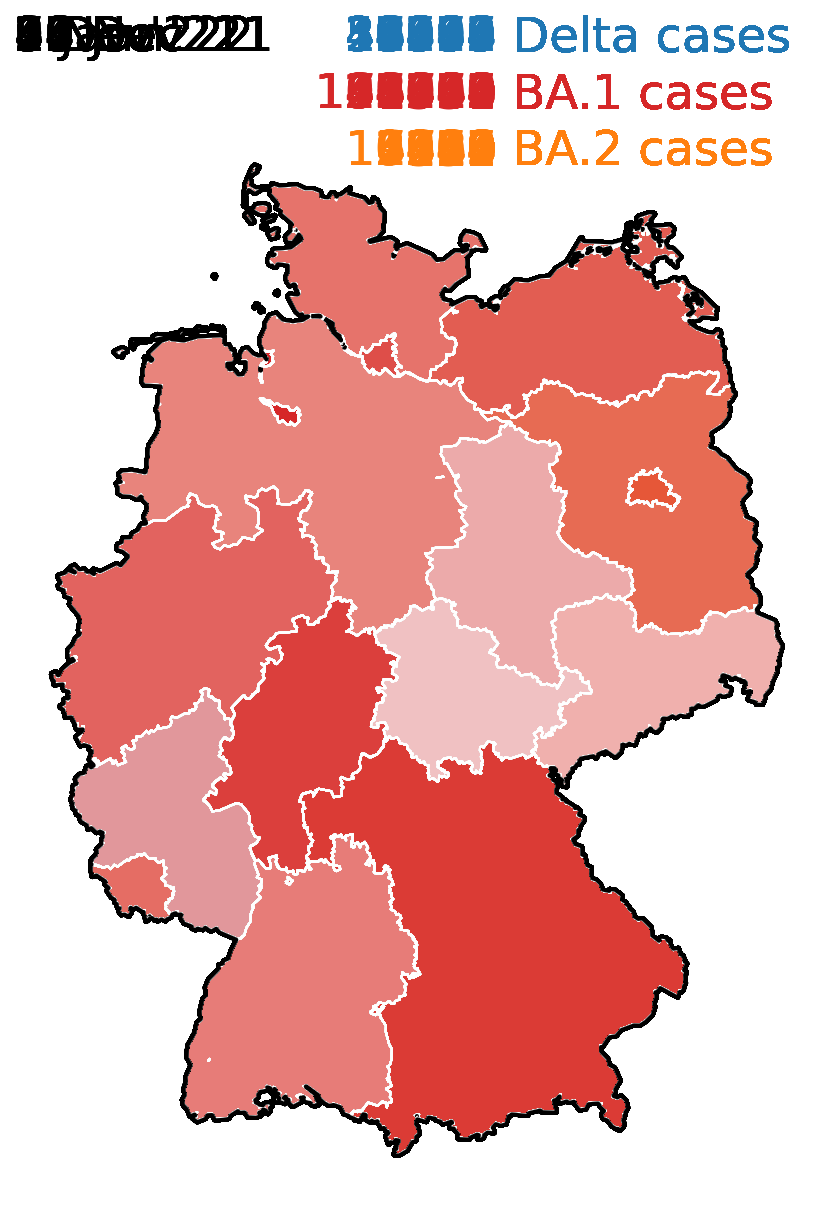

In [70]:
fig, ax = plt.subplots(1,1, figsize=(8,10.5), facecolor=None)
camera = Camera(fig)
b0 = bl.copy()#.simplify(1e-2)

ax.axis("off")

for i in tqdm(range(λ.shape[1])): #λ.shape[1])
    
    #alpha = np.minimum(1, λ[:-1,i,[1,4]] * 700) #/λ.max()
    alpha = λ[:-1,i,[1,2,4]]/λ.max()
    c = [make_rgb_transparent(y, make_rgb_transparent(r, make_rgb_transparent(b, (1,1,1), x[2]), x[0]), x[1]) for x in alpha]
    b0.plot(color=c, ax=ax)

    #ax.set_title(cases_land.columns[i].strftime("%-d %b \'%y"), size=12)
    if i == 0:
        ax.set_ylim((None, ax.get_ylim()[0] + 1.05 * (ax.get_ylim()[1]-ax.get_ylim()[0])))
    
    ax.text(0.0, 1.01,  (cases_land.columns[0] + np.timedelta64(i,"D")).strftime("%-d %b \'%y"), size=24, transform=ax.transAxes)
    ax.text(0.6, 1.01,  f"{λ[:-1,i,4] @ capita.values:0.0f}", color = "C0", size=24, transform=ax.transAxes, ha = 'right')
    ax.text(0.6, 0.96,  f"{λ[:-1,i,1] @ capita.values:0.0f}", color = "C3", size=24, transform=ax.transAxes, ha= 'right')
    ax.text(0.6, 0.91,  f"{λ[:-1,i,2] @ capita.values:0.0f}", color = "C1", size=24, transform=ax.transAxes, ha = 'right')
    ax.text(0.6, 1.01,  f" Delta cases", color = "C0", size=24, transform=ax.transAxes)
    ax.text(0.6, 0.96,  f" BA.1 cases", color = "C3", size=24, transform=ax.transAxes)
    ax.text(0.6, 0.91,  f" BA.2 cases", color = "C1", size=24, transform=ax.transAxes)

    bl.boundary.plot(color='w',lw=1, ax=ax)
    de.boundary.plot(color='k',lw=2, ax=ax)
    camera.snap()


In [71]:
animation = camera.animate(interval = 100, blit=True, repeat = False, repeat_delay=1000)

In [72]:
#import ffmpeg
from IPython.display import HTML
import re
HTML(re.sub("width=\"576\"","width=288",animation.to_html5_video()))

# UK analysis

In [220]:
import requests
cases_uk = pd.read_csv("https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=newCasesBySpecimenDate&format=csv", parse_dates=True, index_col=3)["newCasesBySpecimenDate"].sort_index().loc["2021-11-01":].iloc[:-1]

In [221]:
cases_uk

date
2021-11-01     44204
2021-11-02     37274
2021-11-03     35351
2021-11-04     33069
2021-11-05     29716
               ...  
2022-01-22     70857
2022-01-23     87897
2022-01-24    109399
2022-01-25     96393
2022-01-26     87421
Name: newCasesBySpecimenDate, Length: 87, dtype: int64

In [223]:
x = []
c = "United Kingdom"
for v in ['BA.1', 'BA.2', 'BA.3', 'B.1.617.2*']:
    r = requests.get(f"https://lapis.cov-spectrum.org/gisaid/v1/sample/aggregated?fields=date&host=Human&country={c}&dateFrom=2021-11-01&dateTo={np.datetime64('today')}&pangoLineage={v}") #&dataVersion=1642092398
    d = pd.DataFrame(r.json()['data'])
    x.append(pd.DataFrame({v: d['count'].values}, index=pd.DatetimeIndex(d.date)).sort_index()[v])

genomes_uk = pd.DataFrame(x).T.fillna(0)#
genomes_uk.sum(0)

BA.1          211707.0
BA.2            1371.0
BA.3               8.0
B.1.617.2*    363479.0
dtype: float64

In [224]:
genomes_uk["BA.1"][:"2021-11-18"] = 0
genomes_uk["BA.2"][:"2021-12-18"] = 0
foo = np.stack(3 * [cases_uk["2021-11-01":].values], axis=0)
bar = np.stack(3 * [genomes_uk.values], axis=0)

In [225]:
d = [np.datetime64("2021-12-12"), np.datetime64("2021-12-31")]

bar[0,genomes_uk.index > d[0],:] = 0
bar[1,genomes_uk.index <= d[0],:] = 0
bar[1,genomes_uk.index > d[1],:] = 0
bar[2,genomes_uk.index <= d[1],:] = 0

In [226]:
model_uk = MultiLineageTimeShift(
    foo, #cases_uk["2021-11-01":].values.reshape(1,-1),
    bar,    
    np.array([cases_uk.index.to_list().index(i) for i in genomes_uk.index]),
    np.repeat(67.22e6,3),
    #auto_correlation=0.5,
    #linearize=True,
    arma = arma2,
    b_scale=0.05,
    b0_scale=0.5,
    c_scale=5,
    beta_scale= np.append(10.,np.repeat(10., B0.shape[2]-1)),# np.concatenate([np.repeat(1., knots.num_long_basis), np.repeat(.1, knots.num_short_basis)]),
    tau=4.6,
    basis=B0, #knots.basis,
    shift=7,  
    alpha0=.01,
    alpha1=10000., 
    week=True,
    #model_kwargs={'handler':'SVI', 'loss':Trace_ELBO(num_particles=5), 'num_epochs':10000, 'lr':0.001, 'num_samples': 100}
    model_kwargs={'handler':'SVI', 'loss':Trace_ELBO(num_particles=100), 'num_epochs':10000, 'lr':0.05, 'lrd': 1 ** (1/10000), 'num_samples': 100}

)

In [227]:
model_uk.fit()

/Users/mg14/anaconda3/envs/npy/lib/python3.7/site-packages/jax/_src/numpy/lax_numpy.py:6576: UserWarning: Explicitly requested dtype float requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  lax._check_user_dtype_supported(dtype, "astype")


SVI step 0 / 10,000 | 0 %
SVI step 1,000 / 10,000 | 10 %
SVI step 2,000 / 10,000 | 20 %
SVI step 3,000 / 10,000 | 30 %
SVI step 4,000 / 10,000 | 40 %
SVI step 5,000 / 10,000 | 50 %
SVI step 6,000 / 10,000 | 60 %
SVI step 7,000 / 10,000 | 70 %
SVI step 8,000 / 10,000 | 80 %
SVI step 9,000 / 10,000 | 90 %


Text(0, 0.5, 'ELBO')

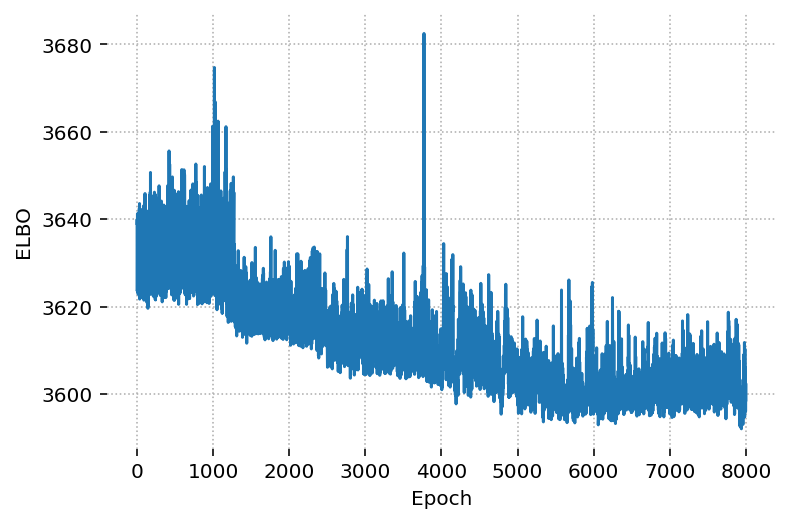

In [228]:
plt.plot(model_uk.loss[2000:])
plt.xlabel('Epoch')
plt.ylabel('ELBO')

In [229]:
import importlib
importlib.reload(gs.misc.misc)
importlib.reload(gs.misc)
from genomicsurveillance.misc import MultiLineageTimeShift, plot_lad, plot_growth_rates, get_transmissibility

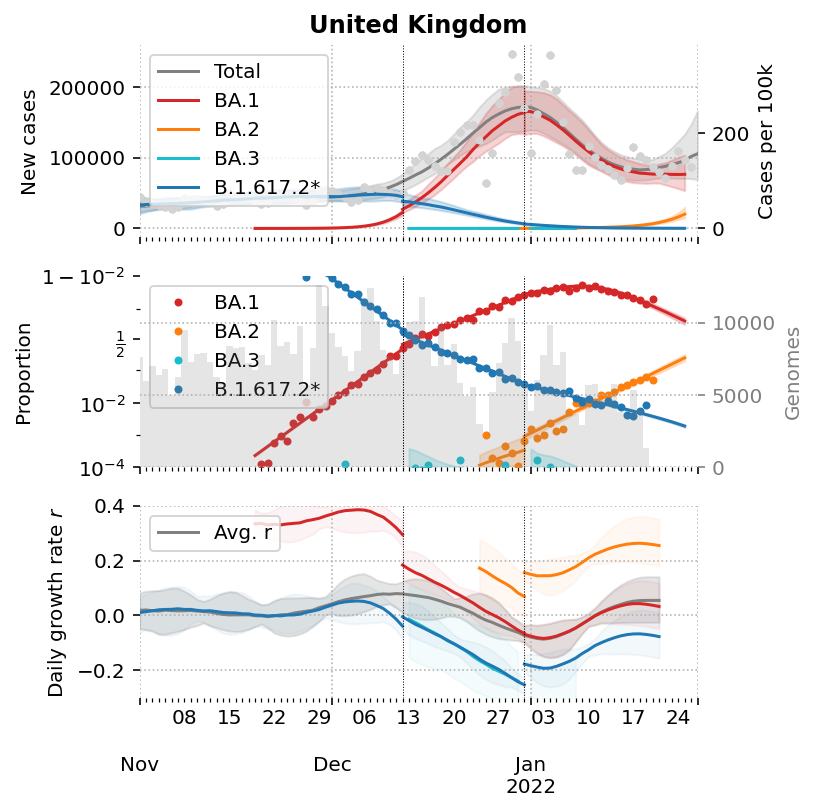

In [232]:
for i in range(2,-1, -1):
    w = np.arange(4) #if i == 2 else [0,2]
    plot_lad(model_uk, i, 
             model_uk.cases, model_uk.lineages, np.array([cases_uk.index.to_list().index(i) for i in genomes_uk.index]), 
             start_date="2021-11-01", 
             show_start_date="2021-11-01",
            lin = w,
            labels = genomes_uk.columns[w],
            lin_colors=np.array(['C3', "C1" ,"C9", "C0","C0"])[w],#, "C6", "C1","C8"],
            #labels=[alias(y) if alias(y) != "AY.121" else "Orf3a:202L" for y in x],#["B.1.1.7", 'Delta', "AY.4", 'B.1.617.2.5', "B.1.177"],
            case_color="grey",
            case_markercolor="lightgrey",
                figsize=(5,6),
                prop_err=False,
            clip_to_lineage_data = True,
             add = True if i < 2 else False,
            bleed_left = 1,
             bleed_right=1,
             show_Rt = False
            )

ax=plt.gcf().get_axes()
    
ax[0].set_title("United Kingdom", size=12, weight='bold')

ax[1].set_yscale("logit")
ax[1].set_ylim((1e-4,1-1e-2))
ax[2].set_ylim((-.3,.4))
ax[2].legend(loc="upper left")
ax[3].grid("off")
for a in ax:
    for dd in d:
        a.axvline(dd, ls=":", color='k', lw=0.5)

In [269]:
get_transmissibility(model_uk)

array([[ 0.33300864,  0.17604876, -0.17180457,  0.        ],
       [ 0.18818859,  0.33405074,  0.00415158,  0.        ],
       [ 0.10874805,  0.33397606, -0.17186999,  0.        ]])

In [85]:
import importlib
importlib.reload(gs.misc.misc)
importlib.reload(gs.misc)
from genomicsurveillance.misc import MultiLineageTimeShift, plot_lad, plot_growth_rates

n  Growth rate r to ancestor      +/-   \
Lineage                                                   
BA.1        211702                   0.105667  0.092848   
BA.2          1369                   0.176049  0.008686   
BA.3             8                  -0.025638  0.096833   
B.1.617.2*  363479                   0.000000  0.000000   

            Growth rate r to baseline BA.1       +/-  
Lineage                                               
BA.1                              0.000000  0.092848  
BA.2                              0.124032  0.008686  
BA.3                             -0.323156  0.096833  
B.1.617.2*                       -0.209982  0.000000

/Users/mg14/Downloads/desh-data/genomicsurveillance/misc/misc.py:852: RuntimeWarning: divide by zero encountered in log
  ax3 = plt.gca().secondary_yaxis('right', functions=(lambda x: np.exp(x*model.tau), lambda x: np.log(x)/model.tau))


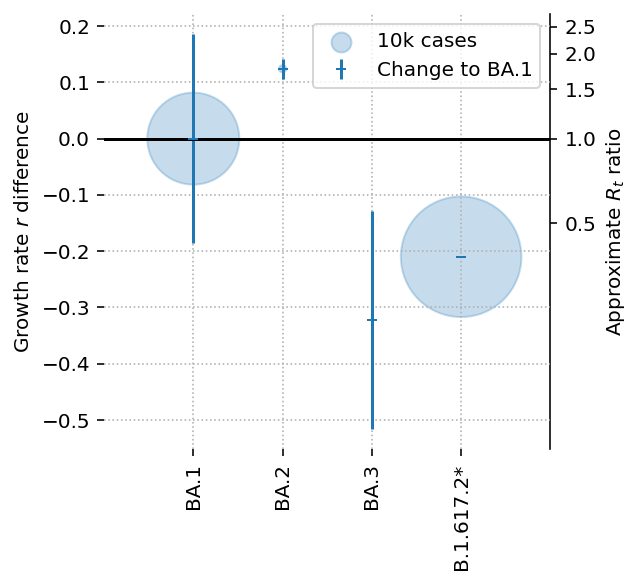

In [268]:
plt.figure(figsize=(4,4))
plot_growth_rates(model_uk, genomes_uk.columns.to_list(), color=["C0","None"], baseline="BA.1")
